|<div style="width:330px"><img src="https://www.ufz.de/static/custom/weblayout/DefaultInternetLayout/img/logos/ufz_transparent_de_blue.png" width="300"/></div>|<div style="width:290px"><img src="https://discourse.opengeosys.org/uploads/default/original/1X/a288c27cc8f73e6830ad98b8729637a260ce3490.png" width="290"/></div>|<div style="width:330px"><img src="https://github.com/nagelt/Teaching_Scripts/raw/9d9e29ecca4b04eaf7397938eacbf116d37ddc93/Images/TUBAF_Logo_blau.png" width="300"/></div>|
|---|---|--:|

*Mehran Ghasabeh  
Chair of Soil Mechanics and Foundation Engineering  
Institute of Geotechnics  
Technische Universität Bergakademie Freiberg.*

https://tu-freiberg.de/en/soilmechanics

# Problem description
## Fault Slip Test - Modelling the induced slip of a fault in argillaceous rock
This study presents benchmark simulations for modeling fault activation processes in argillaceous (clay-rich) rock formations. A Fault Slip Test is employed to investigate the mechanical response of faults to induced slip, typically triggered by fluid injection. The simulations focus on the stress and deformation behaviour of faults, as well as permeability evolution under varying pore pressure and fluid flow conditions. The findings provide crucial insights into the mechanisms governing fault reactivation and induced seismicity, with direct relevance to geological CO<sub>2</sub> storage and subsurface mining activities.

## Model description
A simple square domain with a side length of 20 m is used to represent the host rock, containing a single fracture inclined at a dip angle of 65 degrees. To better capture the fault behavior during water injection-induced reactivation, a finer mesh is applied along and near the fault zone, while a coarser mesh is used further away from the fault.

In this example, the fault models, referred to as <code>FM1.prj</code> and <code>FM2.prj</code>, use the material parameters listed in Table 1 and are analyzed with respect to the results for mass flow rate at the injection points, relative displacements at the anchor points, and both displacements and stresses at the monitoring points.

<table border="1">
  <caption>Table 1: Constitutive parameters for modelling the induced slip of a fault</caption>
  <thead>
    <tr>
      <th>Material</th>
      <th>Parameter</th>
      <th>Value (FM1)</th>
      <th>Value (FM2)</th>
      <th>Unit</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td rowspan="4">Elastic parameters</td>
      <td>Bulk modulus, <i>K</i></td>
      <td>5.9</td>
      <td>5.9</td>
      <td>GPa</td>
    </tr>
    <tr>
      <td>Shear modulus, <i>G</i></td>
      <td>2.3</td>
      <td>2.3</td>
      <td>GPa</td>
    </tr>
    <tr>
      <td>Bulk density, <i>&rho;</i><sub>R</sub></td>
      <td>2450</td>
      <td>2450</td>
      <td>kg/m<sup>3</sup></td>
    </tr>
    <tr>
      <td>Permeability, <i>k</i></td>
      <td>0</td>
      <td>0</td>
      <td>m<sup>2</sup></td>
    </tr>
    <tr>
      <td rowspan="7">Elastoplastic parameters</td>
      <td>Normal Stiffness, <i>k</i><sub>n</sub></td>
      <td>20</td>
      <td>20</td>
      <td>GPa/m</td>
    </tr>
    <tr>
      <td>Shear stiffness, <i>k</i><sub>s</sub></td>
      <td>20</td>
      <td>20</td>
      <td>GPa/m</td>
    </tr>
    <tr>
      <td>Weak plane cohesion, <i>c</i><sub>wp</sub></td>
      <td>0</td>
      <td>0</td>
      <td>MPa</td>
    </tr>
    <tr>
      <td>Weak plane friction angle, <i>&phi;</i><sub>wp</sub></td>
      <td>22</td>
      <td>22</td>
      <td>&deg;</td>
    </tr>
    <tr>
      <td>Weak plane dilatancy angle, <i>&psi;</i><sub>wp</sub></td>
      <td>0</td>
      <td>10</td>
      <td>&deg;</td>
    </tr>
    <tr>
      <td>Initial creation aperture, <i>b</i><sub>i</sub></td>
      <td>28</td>
      <td>0</td>
      <td>&mu;m</td>
    </tr>
    <tr>
      <td>Initial aperture, <i>b</i><sub>0</sub></td>
      <td>0</td>
      <td>10</td>
      <td>&mu;m</td>
    </tr>
    <tr>
      <td rowspan="3">Hydraulic parameters</td>
      <td>Permeability of intact rock, <i>k</i><sub>M</sub></td>
      <td>10<sup>&minus;22</sup></td>
      <td>10<sup>&minus;22</sup></td>
      <td>m<sup>2</sup></td>
    </tr>
    <tr>
      <td>Initial aperture, <i>b</i><sub>0</sub></td>
      <td>10</td>
      <td>10</td>
      <td>&mu;m</td>
    </tr>
    <tr>
      <td>Biot'</i>s coefficieni<i>&alpha;</i></td>
      <td>1.0</td>
      <td>1.0</td>
      <td>-</td>
    </tr>
    <tr>
      <td rowspan="2">Fluid</td>
      <td>Density, <i>&rho;</i><sub>f</sub></td>
      <td>1000</td>
      <td>1000</td>
      <td>kg/m<sup>3</sup></td>
    </tr>
    <tr>
      <td></i>Viscosity, <i>&eta;</i><sub>f</sub></td>
      <td>1000</td>
      <td>1000</td>
      <td>Pa&middot;s</td>
    </tr>
  </tbody>
</ta</i>

In [1]:
import math
import os
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pyvista as pv
import vtuIO

## To run the simulations through the jupyternotebook, the following lib is imported
from ogs6py.ogs import OGS

In [2]:
# Some plot settings
plt.rcParams["lines.linewidth"] = 3.0
plt.rcParams["lines.color"] = "black"
plt.rcParams["legend.frameon"] = True
plt.rcParams["font.family"] = "serif"
plt.rcParams["legend.fontsize"] = 16
plt.rcParams["font.size"] = 16
plt.rcParams["axes.spines.right"] = True
plt.rcParams["axes.spines.top"] = True
plt.rcParams["axes.spines.left"] = True
plt.rcParams["axes.spines.bottom"] = True
plt.rcParams["axes.axisbelow"] = True

# Injection pressure

In [3]:
dt = np.array(
    [0, 1, 1, 22.3, 1, 76, 1, 56, 1, 55, 1, 53, 1, 49, 1, 102, 1, 32, 1, 47, 100, 200]
)  # seconds
p = np.array(
    [
        0.5,
        0.5,
        0.7446,
        0.7446,
        1.919,
        1.919,
        3.627,
        3.627,
        4.094,
        4.094,
        4.511,
        4.5411,
        4.99,
        4.99,
        5.484,
        5.484,
        6.302,
        6.302,
        3.382,
        3.382,
        3.382,
        3.382,
    ]
)  # MPa

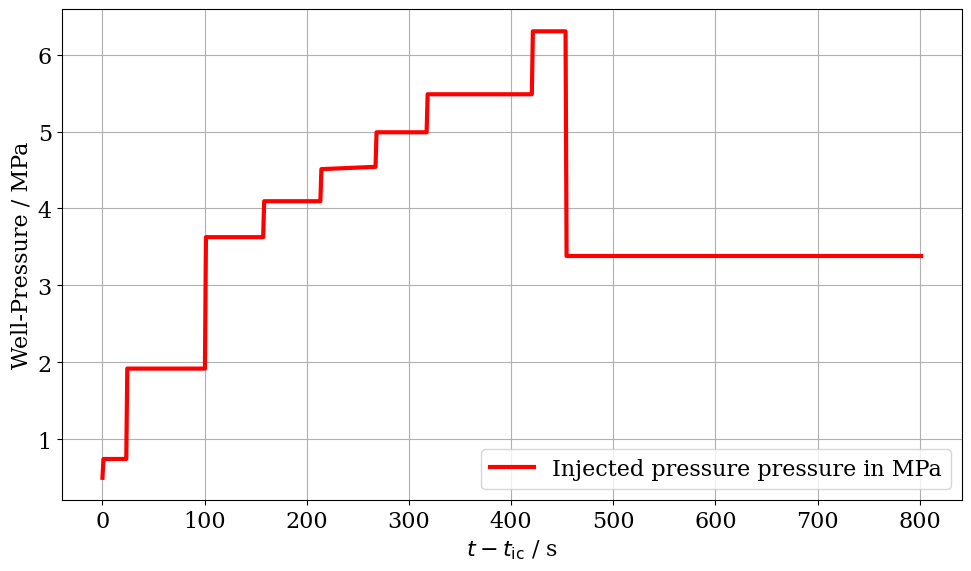

In [4]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(
    dt.cumsum()[1:] - dt[1],
    p[1:],
    label="Injected pressure pressure in MPa",
    color="red",
)
ax.set_xlabel("$t-t_\\mathrm{ic}$ / s")
ax.set_ylabel("Well-Pressure / MPa")
ax.legend()
ax.grid(True)
fig.tight_layout()

# <code>FM1 Model</code>

# Run analyses using ParsidoLU solver on 12 cores

In [5]:
PATH_OGS_PRADISOLU = "~/build/release/bin"
# set the number of cores
mpirun_pardisolu = "OMP_NUM_THREADS=12 OGS_ASM_THREADS=12"

# Create an output directory for the VTU files named <code>_out_FM1</code> and run simulation

In [ ]:
model_FM1 = OGS(INPUT_FILE="FM1_WP.prj", PROJECT_FILE="FM1_WP.prj", ogs_mode="silent")
model_FM1.write_input()

#
out_dir_FM1 = Path(os.environ.get("OGS_TESTRUNNER_OUT_DIR", "_out_FM1"))
if not out_dir_FM1.exists():
    out_dir_FM1.mkdir(parents=True)

# Run simulation
print(f"Running simulation with PardisoLU on 12 cores")
model_FM1.run_model(
    path=PATH_OGS_PRADISOLU,
    logfile=str(out_dir_FM1 / "out_PardisoLU_12_cores.txt"),
    wrapper=mpirun_pardisolu,
    args=f"-o {out_dir_FM1}",
)

# Import ENSI data from the Excel file for FM1 and FM2

In [5]:
injectionPressure = pd.read_excel(
    "Injectionpressure.xlsx", usecols="A,E", skiprows=1, header=None, engine="openpyxl"
)

FM1 = pd.read_excel(
    "D19_TaskB_Step1_output_ENSI_FM1.xlsx",
    sheet_name="Time dependent output",
    usecols="B:W",
    skiprows=range(0, 12),
    header=None,
    engine="openpyxl",
)

FM2 = pd.read_excel(
    "D19_TaskB_Step1_output_ENSI_FM2.xlsx",
    sheet_name="Time dependent output",
    usecols="B:W",
    skiprows=range(0, 12),
    header=None,
    engine="openpyxl",
)

profiles_along_fault_dip_FM1 = pd.read_excel(
    "D19_TaskB_Step1_output_ENSI_FM1.xlsx",
    sheet_name="Profiles along fault dip",
    usecols="A:J",
    skiprows=range(0, 3),
    header=None,
    engine="openpyxl",
)

profiles_along_fault_dip_FM2 = pd.read_excel(
    "D19_TaskB_Step1_output_ENSI_FM2.xlsx",
    sheet_name="Profiles along fault dip",
    usecols="A:J",
    skiprows=range(0, 3),
    header=None,
    engine="openpyxl",
)

# Load the PVD file from the output directory for FM1

In [6]:
pvdfile_FM1 = vtuIO.PVDIO("./_out_FM1/FM1.pvd", dim=2)

# Coordinates of injection, anchors, and monitoring points for post-processing

In [7]:
anchors_point_top = (10.0, 10.25, 0.0)
anchors_point_bot = (10.0, 9.75, 0.0)
##
fault_thickness = 0.0233
deltaL = 1.5
dip_angle = 65.0
dx = (
    fault_thickness
    / 2.0
    * math.sin(math.radians(dip_angle))
    * math.sin(math.radians(dip_angle))
)
dy = (
    fault_thickness
    / 2.0
    * math.sin(math.radians(dip_angle))
    * math.cos(math.radians(dip_angle))
)
#
pinjection_point = (10.0, 10.0, 0.0)
pinjection_point_left = (pinjection_point[0] - dx, pinjection_point[1] + dy, 0.0)
pinjection_point_right = (pinjection_point[0] + dx, pinjection_point[1] - dy, 0.0)
monitoring_point_p3 = (
    pinjection_point[0] - deltaL * math.cos(math.radians(dip_angle)),
    pinjection_point[1] - deltaL * math.sin(math.radians(dip_angle)),
    0.0,
)
monitoring_point_p3_left = (
    monitoring_point_p3[0] - dx,
    monitoring_point_p3[1] + dy,
    0.0,
)
monitoring_point_p3_right = (
    monitoring_point_p3[0] + dx,
    monitoring_point_p3[1] - dy,
    0.0,
)

In [8]:
displacement_points = {
    "pt0": anchors_point_top,
    "pt1": anchors_point_bot,
    "pt2": pinjection_point_left,
    "pt3": pinjection_point_right,
    "pt4": monitoring_point_p3_left,
    "pt5": monitoring_point_p3_right,
}
#
pressure_points = {"pt0": pinjection_point, "pt1": monitoring_point_p3}
#
pinj_pt0 = (9.97772, 9.97721, 0.0)
pinj_pt1 = (9.99711, 9.96882, 0.0)
pinj_pt2 = (10.0097, 9.99581, 0.0)
pinj_pt3 = (10.0223, 10.0228, 0.0)
pinj_pt4 = (10.0029, 10.0312, 0.0)
pinj_pt5 = (9.99031, 10.0042, 0.0)
flowRate_points = {
    "pt0": pinj_pt0,
    "pt1": pinj_pt1,
    "pt2": pinj_pt2,
    "pt3": pinj_pt3,
    "pt4": pinj_pt4,
    "pt5": pinj_pt5,
}
stress_points = {"pt0": pinjection_point, "pt1": monitoring_point_p3}

# Extract results for mass flow rate, pressure, displacement, and stress at corresponding post-processing points

In [9]:
results = {}
results["MassFlowRate"] = pvdfile_FM1.read_time_series(
    "MassFlowRate", pts=flowRate_points
)
results["displacement"] = pvdfile_FM1.read_time_series(
    "displacement", pts=displacement_points
)
results["pressure"] = pvdfile_FM1.read_time_series(
    "pressure_interpolated", pts=pressure_points
)
results["stress"] = pvdfile_FM1.read_time_series("sigma", pts=stress_points)

timeSteps = pvdfile_FM1.timesteps

# Pressure at monitoring point P3: $(0.0, -0.63, -1.36)$

(0.0, 800.0)

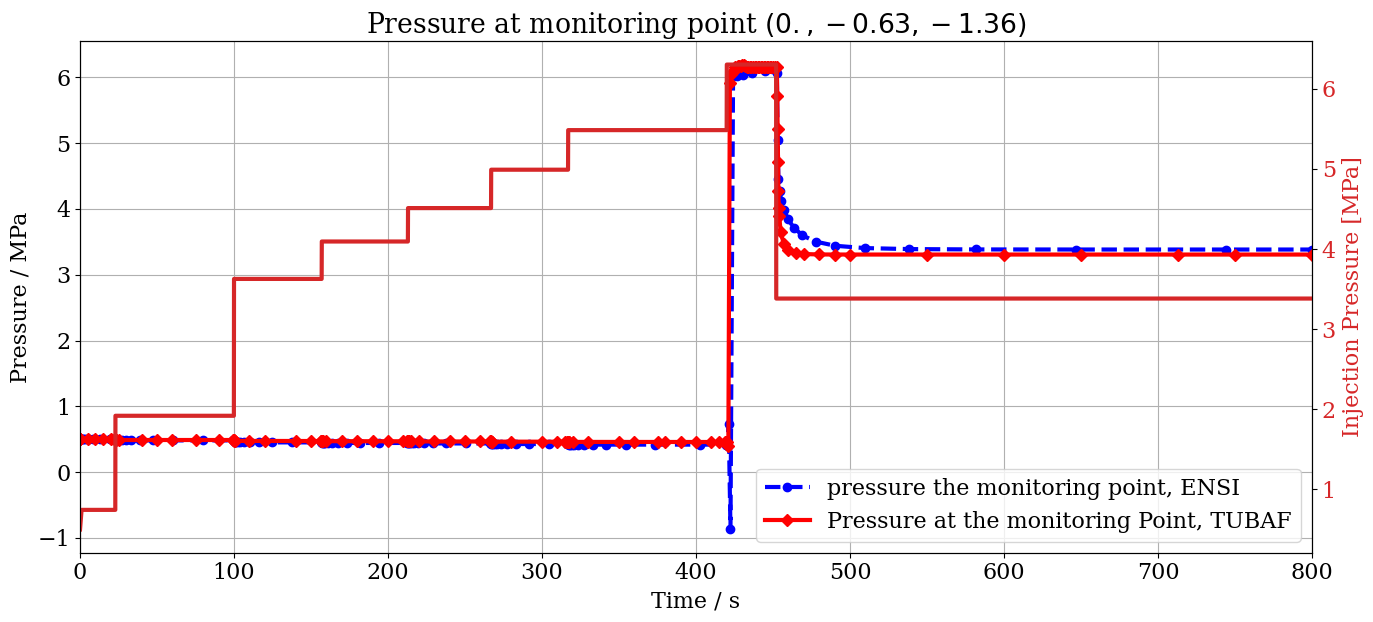

In [10]:
fig, ax1 = plt.subplots(figsize=(13.5, 6.5))
ax1.plot(
    FM1[1],
    FM1[3] * 1e-6,
    label="pressure the monitoring point, ENSI",
    color="blue",
    ls="--",
    marker="o",
)

ax1.plot(
    timeSteps,
    results["pressure"]["pt1"] * 1e-6,
    label="Pressure at the monitoring Point, TUBAF",
    color="red",
    ls="-",
    marker="D",
)

ax1.set_title("Pressure at monitoring point $(0., -0.63, -1.36)$")
ax1.set_xlabel("Time / s")
ax1.set_ylabel("Pressure / MPa")
ax1.set_xticks(np.arange(0, 900, 100))
ax1.legend(loc="lower right")
ax1.grid(True)
fig.tight_layout()
# Create a second y-axis for the second data series
ax2 = ax1.twinx()
color = "tab:red"
ax2.set_ylabel("Injection Pressure [MPa]", color=color)  # For the second data series
ax2.plot(injectionPressure[0], injectionPressure[4] / 1e6, color=color)
ax2.tick_params(axis="y", labelcolor=color)
ax2.set_xlim([0, 800])

# Pressure along fault dip at $t=317$ s

In [11]:
start_point_left = (5.32527, 0.0, 0.0)
end_point_left = (14.6514, 20.0, 0.0)

start_point_right = (5.34857, 0.0, 0.0)
end_point_right = (14.6747, 20.0, 0.0)

start_point_mid = (
    start_point_left[0] + (start_point_right[0] - start_point_left[0]) / 2.0,
    0.0,
    0.0,
)
end_point_mid = (
    end_point_left[0] + (end_point_right[0] - end_point_left[0]) / 2.0,
    20.0,
    0.0,
)

stop = np.sqrt(
    (end_point_mid[0] - start_point_mid[0]) ** 2.0
    + (end_point_mid[1] - start_point_mid[1]) ** 2.0
)


def divide_line(start_point, end_point, n):
    fault_axis = []
    for i in range(0, n + 1):
        x = start_point[0] + (end_point[0] - start_point[0]) * i / n
        y = start_point[1] + (end_point[1] - start_point[1]) * i / n
        fault_axis.append([x, y, 0.0])
    return fault_axis


npts = 1000
fpoints_mid = divide_line(start_point_mid, end_point_mid, npts)
fpoints_left = divide_line(start_point_left, end_point_left, npts)
fpoints_right = divide_line(start_point_right, end_point_right, npts)
rad = np.linspace(start=0, stop=stop, num=npts + 1)

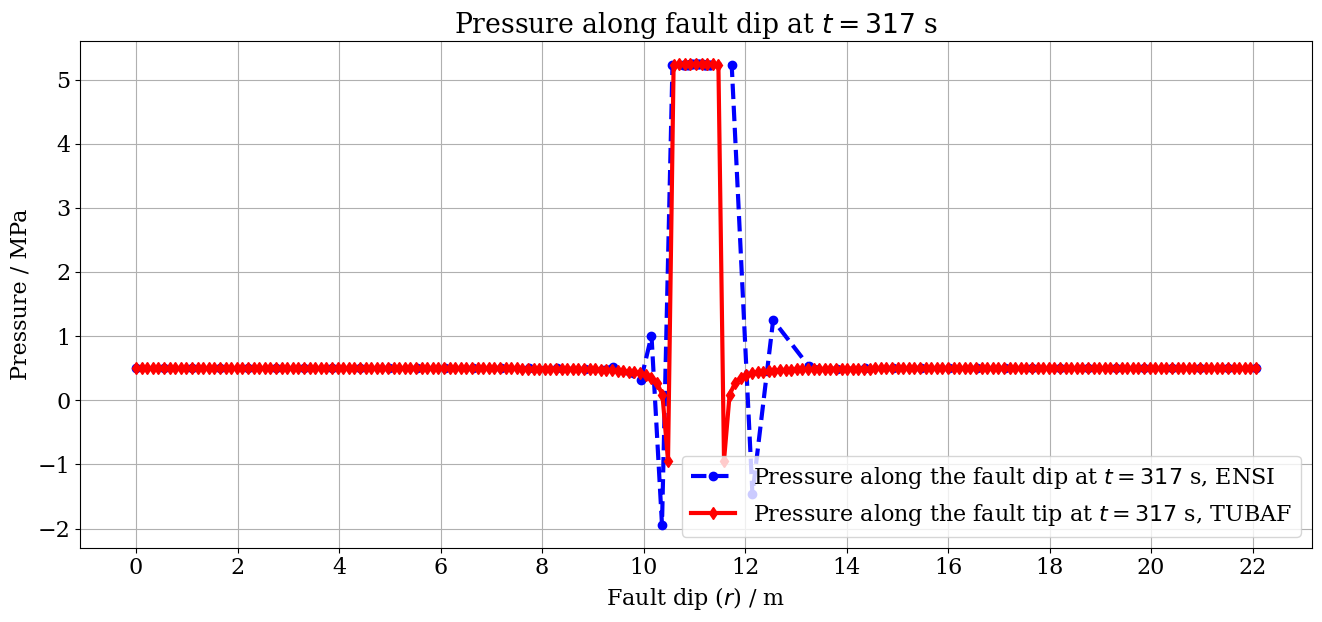

In [12]:
fig, ax = plt.subplots(figsize=(13.5, 6.5))

# Plot the first dataset (ENSI pressure along the fault dip) after filtering out zeros
nonzero_indices_1 = profiles_along_fault_dip_FM1[1] != 0  # Find non-zero indices
ax.plot(
    profiles_along_fault_dip_FM1[0][nonzero_indices_1],  # Filter x-values
    profiles_along_fault_dip_FM1[1][nonzero_indices_1]
    * 1e-6,  # Filter y-values and convert to MPa
    label="Pressure along the fault dip at $t=317$ s, ENSI",
    color="blue",
    ls="--",
    marker="o",
)

# Define the time for the second dataset
itime = 317

# Plot the second dataset (TUBAF pressure along the fault tip) after filtering out zeros
rad_data = rad[::5]
pressure_data = (
    pvdfile_FM1.read_set_data(
        itime, "pressure_interpolated", pointsetarray=fpoints_mid
    )[::5]
    * 1e-6
)
nonzero_indices_2 = pressure_data != 0  # Find non-zero indices
ax.plot(
    rad_data[nonzero_indices_2],  # Filter x-values
    pressure_data[nonzero_indices_2],  # Filter y-values
    label=f"Pressure along the fault tip at $t = {itime}$ s, TUBAF",
    color="red",
    ls="-",
    marker="d",
)

# Set plot title and axis labels
ax.set_title("Pressure along fault dip at $t=317$ s")
ax.set_xlabel("Fault dip ($r$) / m")
ax.set_ylabel("Pressure / MPa")
ax.set_xticks(np.arange(0, 24, 2))
ax.legend(loc="lower right")
ax.grid(True)
# Adjust layout
fig.tight_layout()

# Injection Rate

(0.0, 800.0)

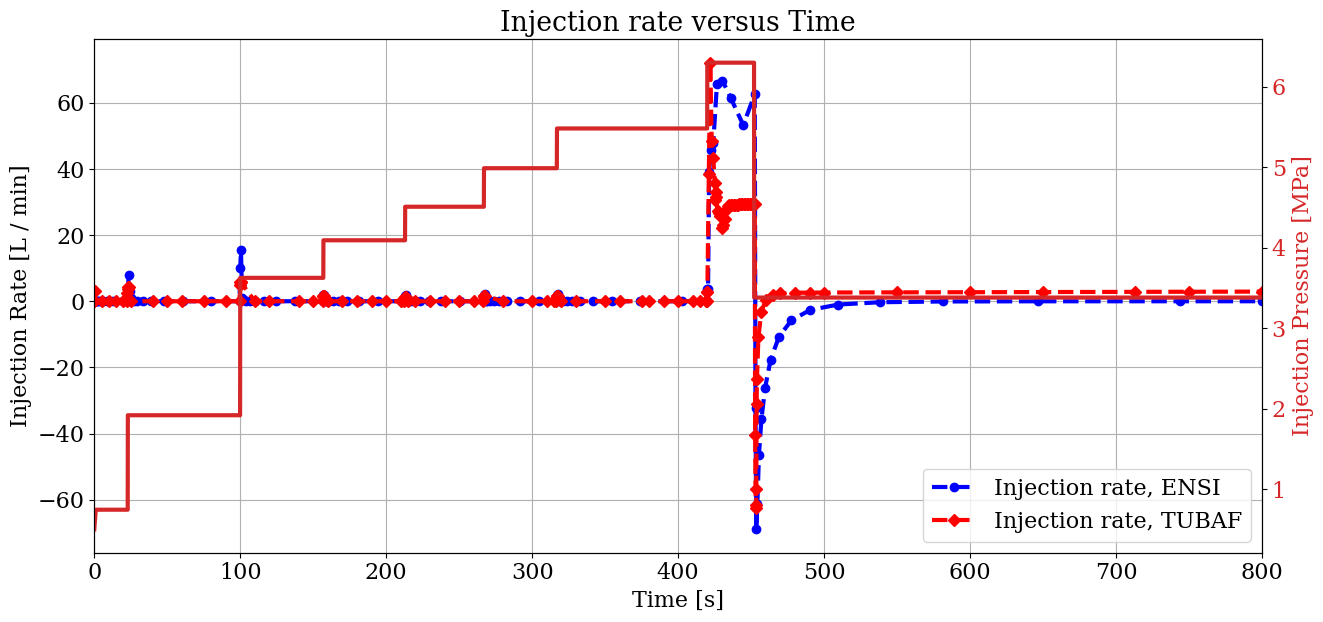

In [13]:
fig, ax1 = plt.subplots(figsize=(13, 6.5))
flowRate_sum = 0.0
for i in range(len(flowRate_points)):
    flowRate_sum += results["MassFlowRate"][f"pt{i}"]

ax1.plot(
    FM1[1],
    FM1[2],
    label="Injection rate, ENSI",
    color="blue",
    ls="--",
    marker="o",
)
ax1.plot(
    timeSteps,
    flowRate_sum * 60.0,
    label="Injection rate, TUBAF",
    color="red",
    ls="--",
    marker="D",
)

ax1.set_title("Injection rate versus Time")
ax1.set_xlabel("Time [s]")
ax1.set_ylabel("Injection Rate [L / min]")
ax.set_xticks(np.arange(0, 900, 100))
ax1.legend()
ax1.legend(loc="lower right")
ax1.grid(True)
fig.tight_layout()
# Create a second y-axis for the second data series
ax2 = ax1.twinx()
color = "tab:red"
ax2.set_ylabel("Injection Pressure [MPa]", color=color)  # For the second data series
ax2.plot(injectionPressure[0], injectionPressure[4] / 1e6, color=color)
ax2.tick_params(axis="y", labelcolor=color)
ax2.set_xlim([0, 800])

# Differential displacements between anchors

(0.0, 800.0)

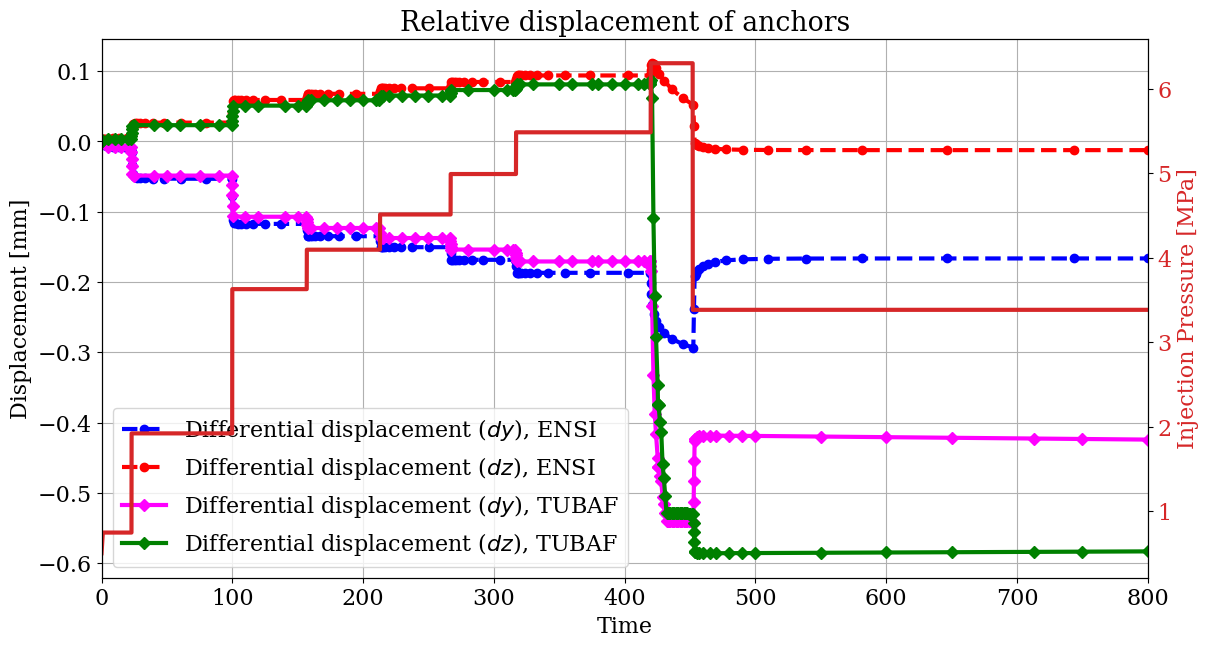

In [14]:
fig, ax1 = plt.subplots(figsize=(13.5, 7))
ax1.plot(
    FM1[1],
    FM1[6] * 1000.0,
    label="Differential displacement ($dy$), ENSI",
    color="blue",
    ls="--",
    marker="o",
)

ax1.plot(
    FM1[1],
    FM1[7] * 1000.0,
    label="Differential displacement ($dz$), ENSI",
    color="red",
    ls="--",
    marker="o",
)

ax1.plot(
    timeSteps,
    results["displacement"]["pt0"].T[0] * 1000
    - results["displacement"]["pt1"].T[0] * 1000,
    label="Differential displacement ($dy$), TUBAF",
    color="magenta",
    ls="-",
    marker="D",
)

ax1.plot(
    timeSteps,
    results["displacement"]["pt0"].T[1] * 1000
    - results["displacement"]["pt1"].T[1] * 1000,
    label="Differential displacement ($dz$), TUBAF",
    color="green",
    ls="-",
    marker="D",
)

ax1.set_title("Relative displacement of anchors")
ax1.set_xlabel("Time")
ax1.set_ylabel("Displacement [mm]")
ax1.legend(loc="best")
ax1.grid(True)

# Create a second y-axis for the second data series
ax2 = ax1.twinx()
color = "tab:red"
ax2.set_ylabel("Injection Pressure [MPa]", color=color)  # For the second data series
ax2.plot(injectionPressure[0], injectionPressure[4] / 1e6, color=color)
ax2.tick_params(axis="y", labelcolor=color)
ax2.set_xlim([0, 800])
# Set x-axis limits

# Calculation of the normal and shear displacment along the fault dip

In [15]:
def displacement_ns(file, theta, pt_left, pt_right):
    u_nd_left = file["displacement"][pt_left].T[0] * math.cos(
        math.radians(theta)
    ) + file["displacement"][pt_left].T[1] * math.sin(math.radians(theta))
    u_sd_left = -file["displacement"][pt_left].T[0] * math.sin(
        math.radians(theta)
    ) + file["displacement"][pt_left].T[1] * math.cos(math.radians(theta))
    ##
    u_nd_right = file["displacement"][pt_right].T[0] * math.cos(
        math.radians(theta)
    ) + file["displacement"][pt_right].T[1] * math.sin(math.radians(theta))
    u_sd_right = -file["displacement"][pt_right].T[0] * math.sin(
        math.radians(theta)
    ) + file["displacement"][pt_right].T[1] * math.cos(math.radians(theta))
    return abs(u_nd_left) + abs(u_nd_right), abs(u_sd_left) + abs(u_sd_right)

# Fault displacement at P1: $(0., 0., 0.)$

In [16]:
u_nd, u_sd = {}, {}
u_nd, u_sd = displacement_ns(results, 155, "pt2", "pt3")

(0.0, 800.0)

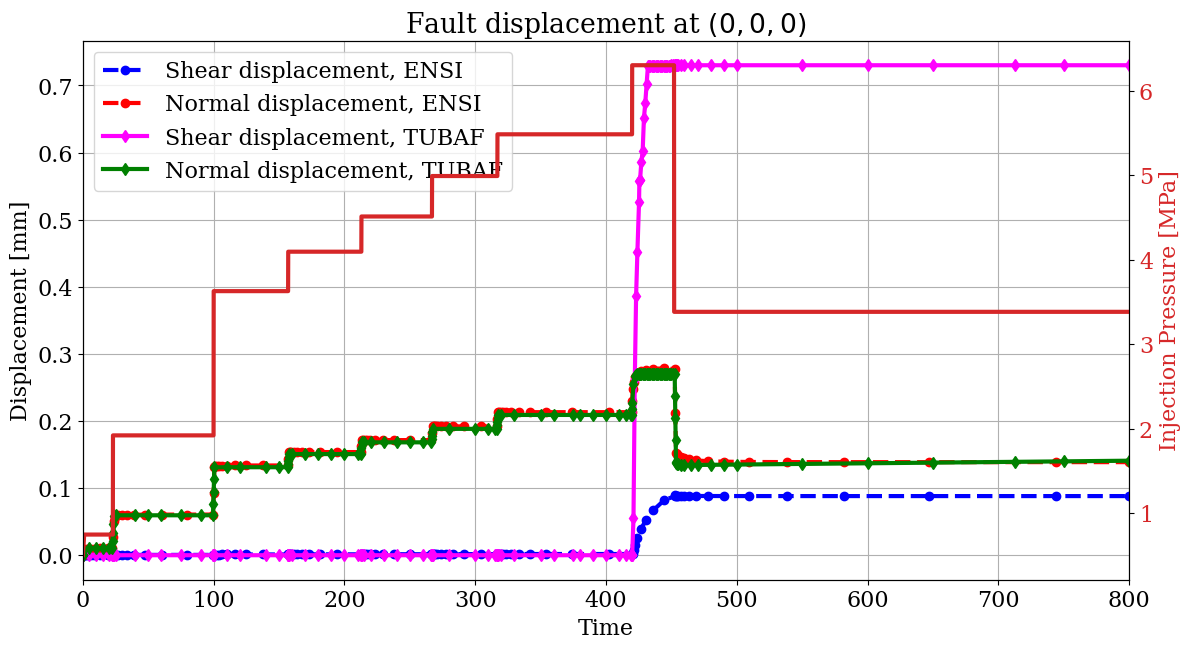

In [17]:
fig, ax1 = plt.subplots(figsize=(13.5, 7))
ax1.plot(
    FM1[1],
    FM1[8] * 1000.0,
    label="Shear displacement, ENSI",
    color="blue",
    ls="--",
    marker="o",
)  # Line plot with markers
ax1.plot(
    FM1[1],
    FM1[10] * 1000.0,
    label="Normal displacement, ENSI",
    color="red",
    ls="--",
    marker="o",
)  # Line plot with markers
ax1.plot(
    timeSteps,
    u_sd * 1000.0,
    label="Shear displacement, TUBAF",
    color="magenta",
    ls="-",
    marker="d",
)
ax1.plot(
    timeSteps,
    u_nd * 1000.0,
    label="Normal displacement, TUBAF",
    color="green",
    ls="-",
    marker="d",
)
ax1.set_title("Fault displacement at $(0, 0, 0)$")
ax1.set_xlabel("Time")
ax1.set_ylabel("Displacement [mm]")
ax1.legend(loc="best")
ax1.grid(True)

# Create a second y-axis for the second data series
ax2 = ax1.twinx()
color = "tab:red"
ax2.set_ylabel("Injection Pressure [MPa]", color=color)  # For the second data series
ax2.plot(injectionPressure[0], injectionPressure[4] / 1e6, color=color)
ax2.tick_params(axis="y", labelcolor=color)
ax2.set_xlim([0, 800])

# Fault displacement at P3: $(0.0, -0.63, -1.36)$


In [18]:
u_nd, u_sd = {}, {}
u_nd, u_sd = displacement_ns(results, 155, "pt4", "pt5")

(0.0, 800.0)

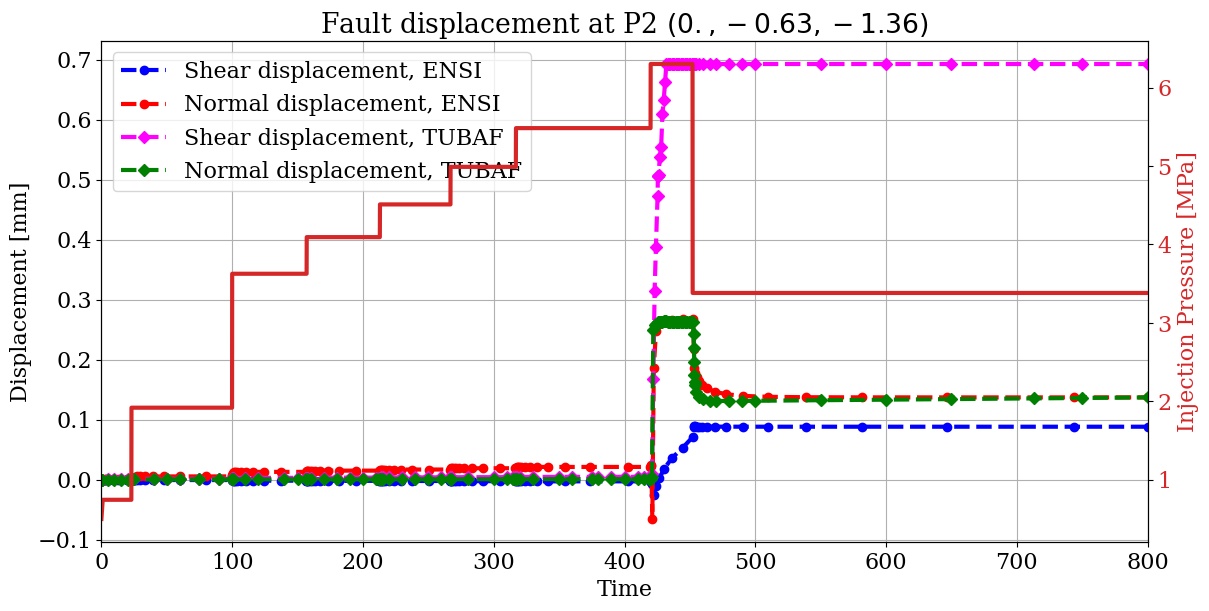

In [19]:
fig, ax1 = plt.subplots(figsize=(13.5, 6.5))
ax1.plot(
    FM1[1],
    FM1[14] * 1000.0,
    label="Shear displacement, ENSI",
    color="blue",
    ls="--",
    marker="o",
)
ax1.plot(
    FM1[1],
    FM1[16] * 1000.0,
    label="Normal displacement, ENSI",
    color="red",
    ls="--",
    marker="o",
)
ax1.plot(
    timeSteps,
    u_sd * 1000.0,
    label="Shear displacement, TUBAF",
    color="magenta",
    ls="--",
    marker="D",
)
ax1.plot(
    timeSteps,
    u_nd * 1000.0,
    label="Normal displacement, TUBAF",
    color="green",
    ls="--",
    marker="D",
)
ax1.set_title("Fault displacement at P2 $(0., -0.63, -1.36)$")
ax1.set_xlabel("Time")
ax1.set_ylabel("Displacement [mm]")
ax1.legend()
ax1.grid(True)

# Create a second y-axis for the second data series
ax2 = ax1.twinx()
color = "tab:red"
ax2.set_ylabel("Injection Pressure [MPa]", color=color)  # For the second data series
ax2.plot(injectionPressure[0], injectionPressure[4] / 1e6, color=color)
ax2.tick_params(axis="y", labelcolor=color)
ax2.set_xlim([0, 800])
# Set x-axis limits

# Calculation of the shear and normal stresses on the fault dip

In [20]:
def stress_ns(file, pt, theta):
    nVector = np.array(
        [math.cos(math.radians(theta)), math.sin(math.radians(theta)), 0.0]
    )
    # Compute the dyadic product
    dyadic_product_of_the_normal_vector = np.outer(nVector, nVector)
    ndyn_wp = dyadic_product_of_the_normal_vector
    stress_ten = np.zeros((3, 3))
    sigma_wp = np.array([0.0])
    tau_wp = np.array([0.0])
    sig00 = np.array([0.0])
    sig11 = np.array([0.0])
    sig22 = np.array([0.0])
    sig01 = np.array([0.0])
    sig02 = np.array([0.0])
    sig12 = np.array([0.0])
    stress = file[pt]
    for i in range(len(stress)):
        stress_ten[0, 0] = np.array(stress)[i].T[0]
        stress_ten[1, 1] = np.array(stress)[i].T[1]
        stress_ten[2, 2] = np.array(stress)[i].T[2]
        stress_ten[0, 1] = np.array(stress)[i].T[3]
        stress_ten[0, 2] = 0.0
        stress_ten[1, 2] = 0.0
        stress_ten[1, 0] = np.array(stress)[i].T[3]
        stress_ten[2, 0] = 0.0
        stress_ten[2, 1] = 0.0
        #####
        s_wp = np.tensordot(stress_ten, ndyn_wp)
        t_wp = np.sqrt(
            np.tensordot((np.dot(stress_ten, stress_ten.transpose())), ndyn_wp)
            - s_wp * s_wp
        )
        sigma_wp = np.append(sigma_wp, s_wp)
        tau_wp = np.append(tau_wp, t_wp)
        sig01 = np.append(sig01, stress_ten[0, 1])
        sig02 = np.append(sig02, stress_ten[0, 2])
        sig12 = np.append(sig12, stress_ten[1, 2])
        sig00 = np.append(sig00, stress_ten[0, 0])
        sig11 = np.append(sig11, stress_ten[1, 1])
        sig22 = np.append(sig22, stress_ten[2, 2])
    return sig01, sig02, sig12, sig00, sig11, sig22, sigma_wp, tau_wp

# Fault stress at P1:$(0., 0., 0.)$

In [21]:
theta = 155.0
pt = "pt0"
file = results["stress"]
sig01, sig02, sig12, sig00, sig11, sig22, sigma_wp, tau_wp = (
    {},
    {},
    {},
    {},
    {},
    {},
    {},
    {},
)
sig01, sig02, sig12, sig00, sig11, sig22, sigma_wp, tau_wp = stress_ns(file, pt, theta)

(0.0, 800.0)

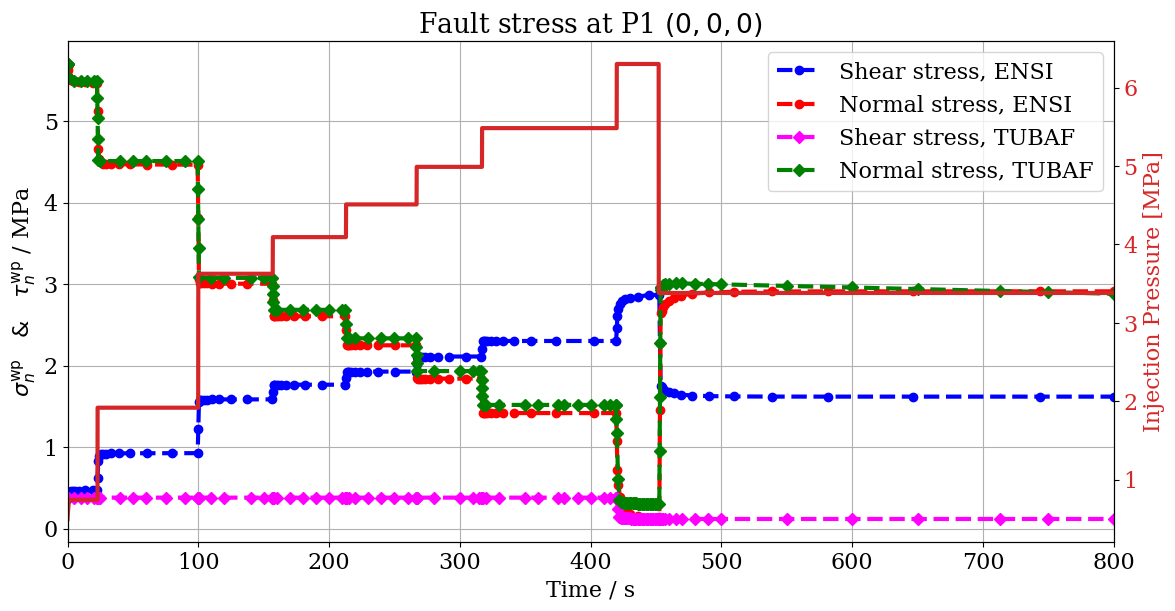

In [22]:
fig, ax1 = plt.subplots(figsize=(13.5, 6.5))
ax1.plot(
    FM1[1],
    FM1[17] * 1e-6,
    label="Shear stress, ENSI",
    color="blue",
    ls="--",
    marker="o",
)
ax1.plot(
    FM1[1],
    FM1[18] * 1e-6,
    label="Normal stress, ENSI",
    color="red",
    ls="--",
    marker="o",
)
ax1.plot(
    timeSteps,
    tau_wp[1:] * 1e-6,
    label="Shear stress, TUBAF",
    color="magenta",
    ls="--",
    marker="D",
)
ax1.plot(
    timeSteps,
    -sigma_wp[1:] * 1e-6,
    label="Normal stress, TUBAF",
    color="green",
    ls="--",
    marker="D",
)

ax1.set_ylabel("$\\sigma^{\\mathrm{wp}}_n  \quad & \quad \\tau^{\\mathrm{wp}}_n$ / MPa")
ax1.set_xlabel("Time / s")
ax1.set_title("Fault stress at P1 $(0, 0, 0)$")
ax1.legend()
ax1.grid(True)

# Create a second y-axis for the second data series
ax2 = ax1.twinx()
color = "tab:red"
ax2.set_ylabel("Injection Pressure [MPa]", color=color)  # For the second data series
ax2.plot(injectionPressure[0], injectionPressure[4] / 1e6, color=color)
ax2.tick_params(axis="y", labelcolor=color)
ax2.set_xlim([0, 800])

# Fault stress at P3:$(0., -0.63, -1.36)$

In [23]:
theta = 155.0
pt = "pt1"
file = results["stress"]
sig01, sig02, sig12, sig00, sig11, sig22, sigma_wp, tau_wp = (
    {},
    {},
    {},
    {},
    {},
    {},
    {},
    {},
)
sig01, sig02, sig12, sig00, sig11, sig22, sigma_wp, tau_wp = stress_ns(file, pt, theta)

(0.0, 800.0)

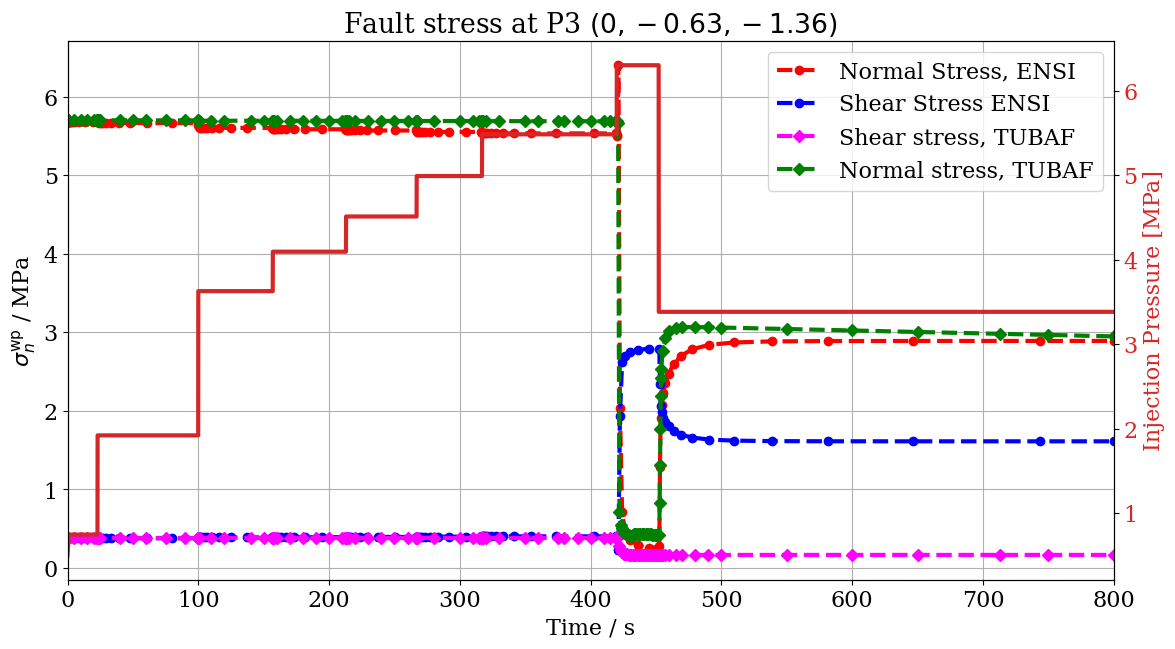

In [25]:
fig, ax1 = plt.subplots(figsize=(13.5, 7))
ax1.plot(
    FM1[1],
    FM1[22] * 1e-6,
    label="Normal Stress, ENSI",
    color="red",
    ls="--",
    marker="o",
)  # Line plot with markers
ax1.plot(
    FM1[1], FM1[21] * 1e-6, label="Shear Stress ENSI", color="blue", ls="--", marker="o"
)  # Line plot with markers
ax1.plot(
    timeSteps,
    # -sig01[1:] * 1e-6,
    tau_wp[1:] * 1e-6,
    label="Shear stress, TUBAF",
    color="magenta",
    ls="--",
    marker="D",
)
ax1.plot(
    timeSteps,
    -sigma_wp[1:] * 1e-6,
    label="Normal stress, TUBAF",
    color="green",
    ls="--",
    marker="D",
)
ax1.set_ylabel("$\\sigma^{\\mathrm{wp}}_n$ / MPa")
ax1.set_xlabel("Time / s")
ax1.set_title("Fault stress at P3 $(0, -0.63, -1.36)$")
ax1.legend()
ax1.grid(True)

# Create a second y-axis for the second data series
ax2 = ax1.twinx()
color = "tab:red"
ax2.set_ylabel("Injection Pressure [MPa]", color=color)  # For the second data series
ax2.plot(injectionPressure[0], injectionPressure[4] / 1e6, color=color)
ax2.tick_params(axis="y", labelcolor=color)
ax2.set_xlim([0, 800])
# Set x-axis limits

# Dispalcement jumps between two points (M and N) located on the left and right hand side of the fault along a line prependicular to the fault

In [26]:
def displacement_jump(file, thetap, thetam):
    u_np = file["displacement"]["pt2"].T[0] * math.cos(math.radians(thetap)) + file[
        "displacement"
    ]["pt2"].T[1] * math.sin(math.radians(thetap))

    u_nm = file["displacement"]["pt3"].T[0] * math.cos(math.radians(thetam)) + file[
        "displacement"
    ]["pt3"].T[1] * math.sin(math.radians(thetam))

    u_sp = -file["displacement"]["pt2"].T[0] * math.sin(math.radians(thetap)) + file[
        "displacement"
    ]["pt2"].T[1] * math.cos(math.radians(thetap))

    u_sm = -file["displacement"]["pt3"].T[0] * math.sin(math.radians(thetam)) + file[
        "displacement"
    ]["pt3"].T[1] * math.cos(math.radians(thetam))
    return -u_np, u_nm, -u_sp, u_sm

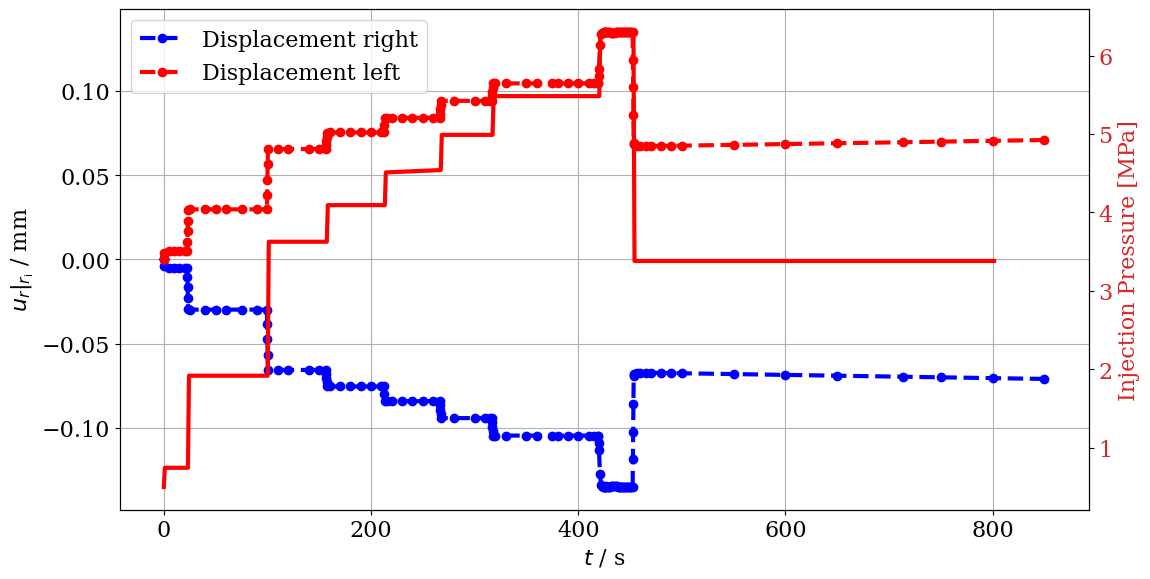

In [27]:
fig, ax1 = plt.subplots(figsize=(12.5, 6.5))
thetap = 155.0
thetam = -25
u_np, u_nm, u_sp, u_sm = displacement_jump(results, thetap, thetam)

ax1.plot(
    timeSteps,
    u_np * 1000.0,
    label="Displacement right",
    ls="--",
    color="blue",
    marker="o",
)
ax1.plot(
    timeSteps,
    u_nm * 1000.0,
    label="Displacement left",
    ls="--",
    color="red",
    marker="o",
)
ax1.set_xlabel("$t$ / s")
ax1.grid(True)
ax1.set_ylabel("$u_r|_{r_\\mathrm{i}}$ / mm")
ax1.legend(loc="upper left")

# Create a second y-axis for the second data series
ax2 = ax1.twinx()
color = "tab:red"
ax2.plot(
    dt.cumsum()[1:] - dt[1],
    p[1:],
    label="Injected pressure pressure in MPa",
    color="red",
)
ax2.set_xlabel("$t-t_\\mathrm{ic}$ / s")
ax2.set_ylabel("Injection Pressure [MPa]", color=color)  # For the second data series
ax2.tick_params(axis="y", labelcolor=color)

# Evolution of permeability ($k_d$) along fault dip

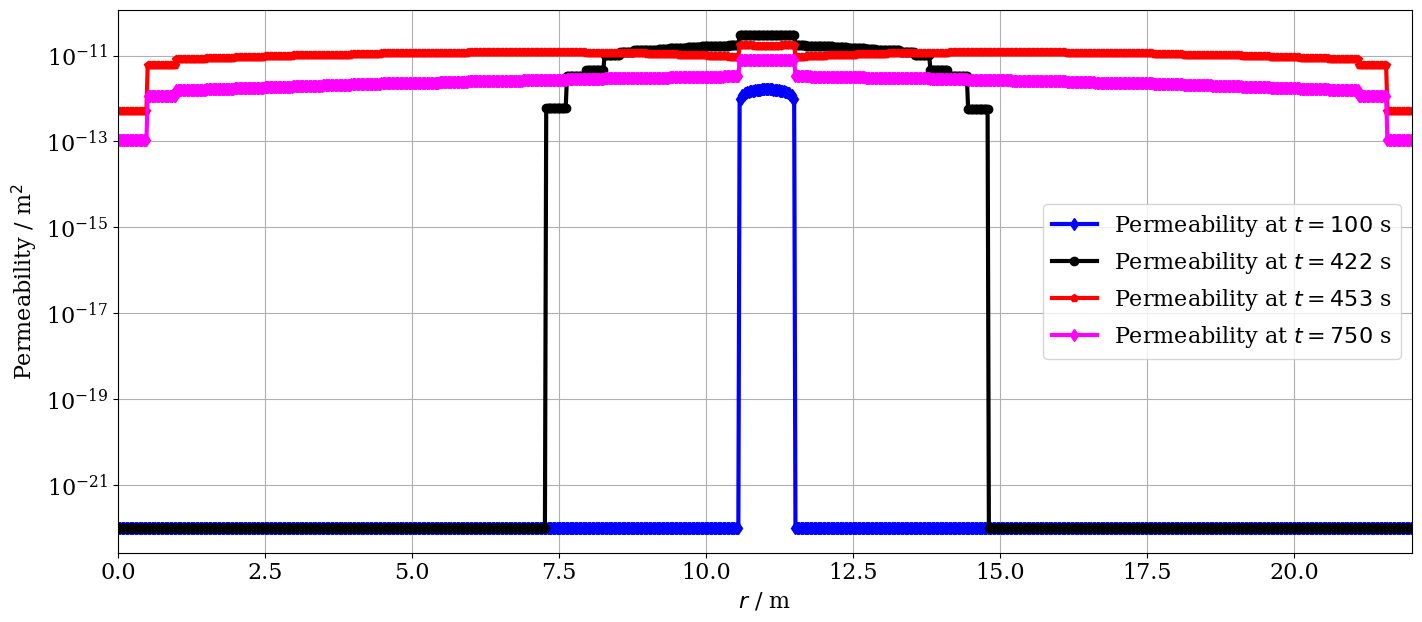

In [28]:
Time = [100, 422, 453, 750]
colors = ["blue", "black", "red", "magenta"]
markers = ["d", "o", "p"]
fig, ax = plt.subplots(figsize=(14.5, 6.5))

# Plotting loop
for k, i in enumerate(Time):
    # Read permeability data
    permeability_data = pvdfile_FM1.read_set_data(
        i, "permeability", pointsetarray=fpoints_mid
    ).T[0]
    # Filter out zero values
    filtered_indices = permeability_data != 0
    filtered_rad = rad[filtered_indices]
    filtered_permeability = permeability_data[filtered_indices]

    # Plot filtered data
    ax.plot(
        filtered_rad,
        filtered_permeability,
        label=f"Permeability at $t = {i}$ s",
        color=colors[k % len(colors)],
        ls="-",
        marker=markers[k % len(markers)],
    )

# Customizations
ax.set(
    xlabel="$r$ / m",
    ylabel="Permeability / m$^\mathrm{2}$",
    xlim=(0.0, 22.0),
)
plt.yscale("log")  # Logarithmic y-axis
ax.legend()
ax.grid(True)
fig.tight_layout()

# Evolution of weak plane equivalent plastic strain along fault dip

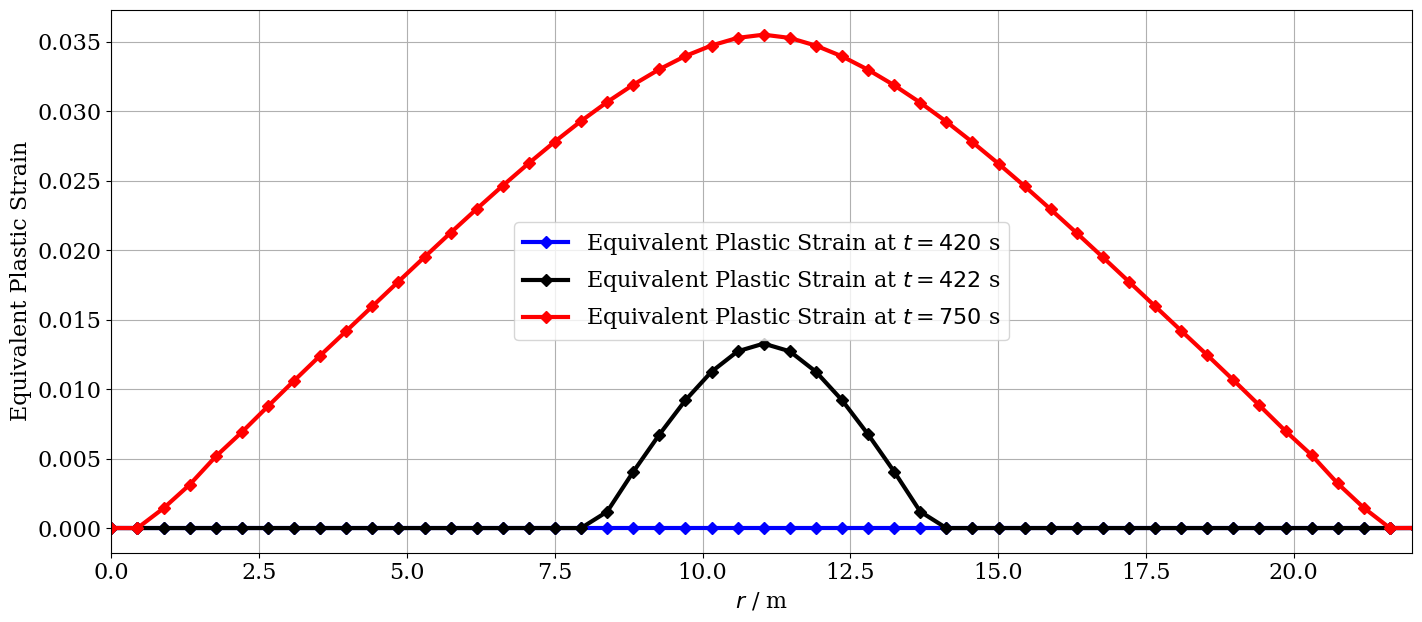

In [29]:
Time = [420, 422, 750]
k = 0
fig, ax = plt.subplots(figsize=(14.5, 6.5))
threshold = 1e-16
for i in Time:
    colors = ["blue", "black", "red", "magenta"]
    markers = ["d", "o"]
    peeq = pvdfile_FM1.read_set_data(
        i, "EquivalentPlasticStrainWP", pointsetarray=fpoints_mid
    )
    peeq_data = peeq.copy()
    peeq_data[peeq <= threshold] = 0.0
    ax.plot(
        rad[::20],
        peeq_data[::20],
        label="Equivalent Plastic Strain at $t = %i$ s" % i,
        color=colors[k],
        ls="-",
        marker="D",
    )
    k += 1
ax.set(xlim=(0.0, 22.0), autoscale_on=True)
ax.set_xlabel("$r$ / m")
ax.set_ylabel("Equivalent Plastic Strain")
ax.legend()
ax.grid(True)
fig.tight_layout()

# Visualization of displacement magnitude

/tmp/ipykernel_311958/4218998309.py:12: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap("jet", 35)


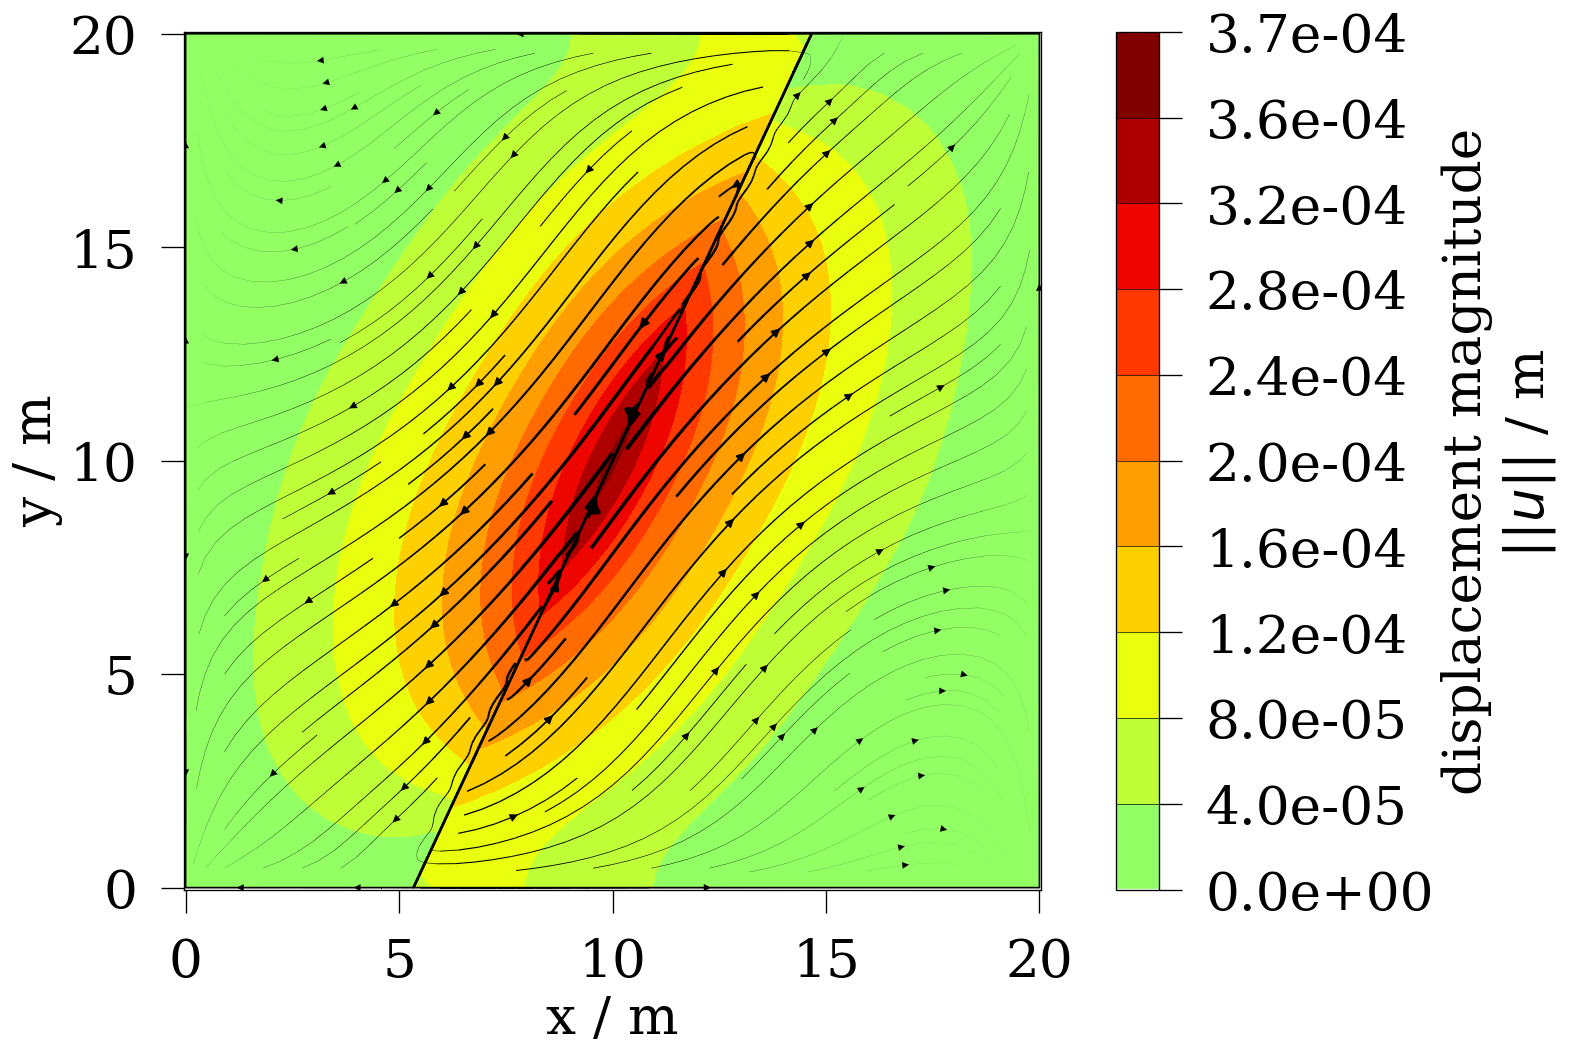

In [30]:
import ogstools as ot
from ogstools.meshlib import MeshSeries
import matplotlib.pyplot as plt

# Load the mesh time series
mesh_series = MeshSeries("./_out_FM1/FM1.pvd")

# Select a specific time step
mesh = mesh_series[-1]

# Define a discrete colormap with 35 levels
cmap = plt.cm.get_cmap("jet", 35)

# Plot with the custom colormap
fig = mesh.plot_contourf(
    ot.variables.displacement,
    show_min=False,
    show_max=False,
    cmap="jet",
)

# <code>FM2 Model</code>

# Create an output directory for the VTU files named <code>_out_FM2</code> and run simulation

In [6]:
model_FM2 = OGS(INPUT_FILE="FM2_WP.prj", PROJECT_FILE="FM2_WP.prj", ogs_mode="silent")
model_FM2.write_input()

#
out_dir_FM2 = Path(os.environ.get("OGS_TESTRUNNER_OUT_DIR", "_out_FM2"))
if not out_dir_FM2.exists():
    out_dir_FM2.mkdir(parents=True)

# Run simulation
print(f"Running simulation with PardisoLU on 12 cores")
model_FM2.run_model(
    path=PATH_OGS_PRADISOLU,
    logfile=str(out_dir_FM2 / "out_PardisoLU_12_cores.txt"),
    wrapper=mpirun_pardisolu,
    args=f"-o {out_dir_FM2}",
)

Running simulation with PardisoLU on 12 cores
OGS finished with project file FM2_WP.prj.
Execution took 635.5902922153473 s
Project file written to output.


# Load the PVD file from the output directory for FM2

In [31]:
pvdfile_FM2 = vtuIO.PVDIO("./_out_FM2/FM2.pvd", dim=2)

In [32]:
results = {}
timeSteps = {}
results["MassFlowRate"] = pvdfile_FM2.read_time_series(
    "MassFlowRate", pts=flowRate_points
)
results["displacement"] = pvdfile_FM2.read_time_series(
    "displacement", pts=displacement_points
)
results["pressure"] = pvdfile_FM2.read_time_series(
    "pressure_interpolated", pts=pressure_points
)
results["stress"] = pvdfile_FM2.read_time_series("sigma", pts=stress_points)

timeSteps = pvdfile_FM2.timesteps

# Pressure at monitoring point P3: $(0.0, -0.63, -1.36)$

(0.0, 800.0)

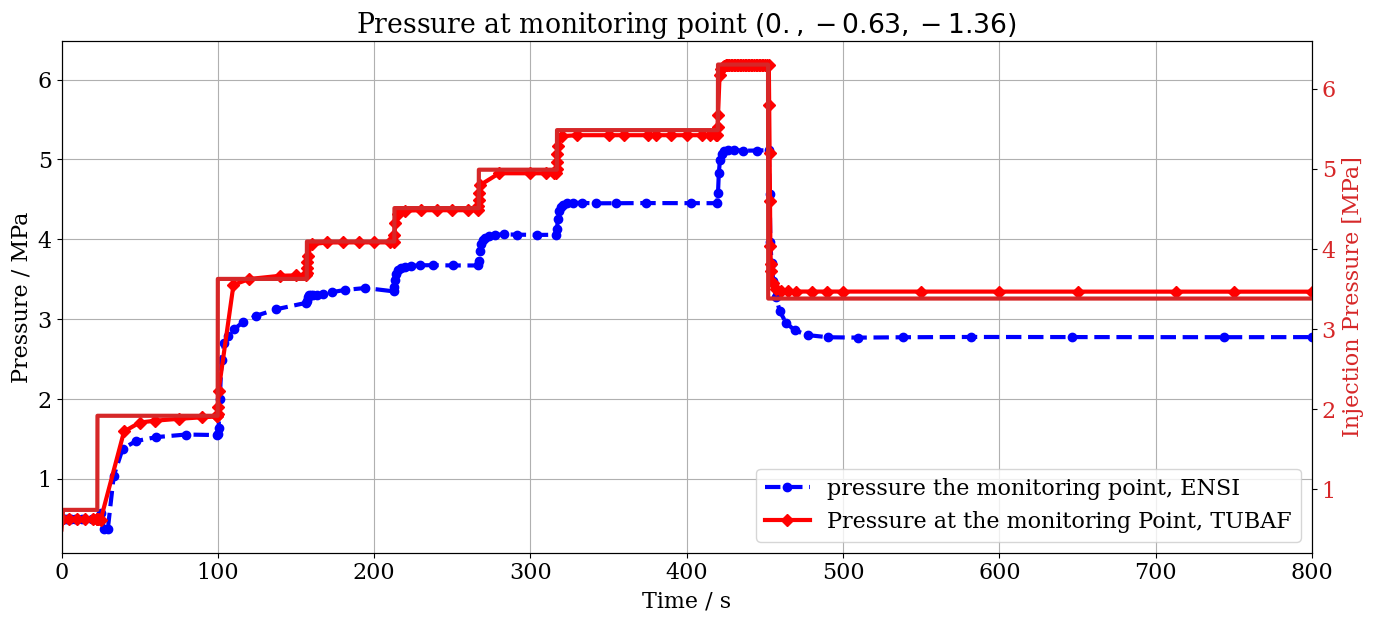

In [33]:
fig, ax1 = plt.subplots(figsize=(13.5, 6.5))
ax1.plot(
    FM2[1],
    FM2[3] * 1e-6,
    label="pressure the monitoring point, ENSI",
    color="blue",
    ls="--",
    marker="o",
)

ax1.plot(
    timeSteps,
    results["pressure"]["pt1"] * 1e-6,
    label="Pressure at the monitoring Point, TUBAF",
    color="red",
    ls="-",
    marker="D",
)

ax1.set_title("Pressure at monitoring point $(0., -0.63, -1.36)$")
ax1.set_xlabel("Time / s")
ax1.set_ylabel("Pressure / MPa")
ax1.set_xticks(np.arange(0, 900, 100))
ax1.legend(loc="lower right")
ax1.grid(True)
fig.tight_layout()
# Create a second y-axis for the second data series
ax2 = ax1.twinx()
color = "tab:red"
ax2.set_ylabel("Injection Pressure [MPa]", color=color)  # For the second data series
ax2.plot(injectionPressure[0], injectionPressure[4] / 1e6, color=color)
ax2.tick_params(axis="y", labelcolor=color)
ax2.set_xlim([0, 800])

# Pressure along fault dip at $t=317$ s

In [34]:
start_point_left = (5.32527, 0.0, 0.0)
end_point_left = (14.6514, 20.0, 0.0)

start_point_right = (5.34857, 0.0, 0.0)
end_point_right = (14.6747, 20.0, 0.0)

start_point_mid = (
    start_point_left[0] + (start_point_right[0] - start_point_left[0]) / 2.0,
    0.0,
    0.0,
)
end_point_mid = (
    end_point_left[0] + (end_point_right[0] - end_point_left[0]) / 2.0,
    20.0,
    0.0,
)

stop = np.sqrt(
    (end_point_mid[0] - start_point_mid[0]) ** 2.0
    + (end_point_mid[1] - start_point_mid[1]) ** 2.0
)


def divide_line(start_point, end_point, n):
    fault_axis = []
    for i in range(0, n + 1):
        x = start_point[0] + (end_point[0] - start_point[0]) * i / n
        y = start_point[1] + (end_point[1] - start_point[1]) * i / n
        fault_axis.append([x, y, 0.0])
    return fault_axis


npts = 1000
fpoints_mid = divide_line(start_point_mid, end_point_mid, npts)
fpoints_left = divide_line(start_point_left, end_point_left, npts)
fpoints_right = divide_line(start_point_right, end_point_right, npts)
rad = np.linspace(start=0, stop=stop, num=npts + 1)

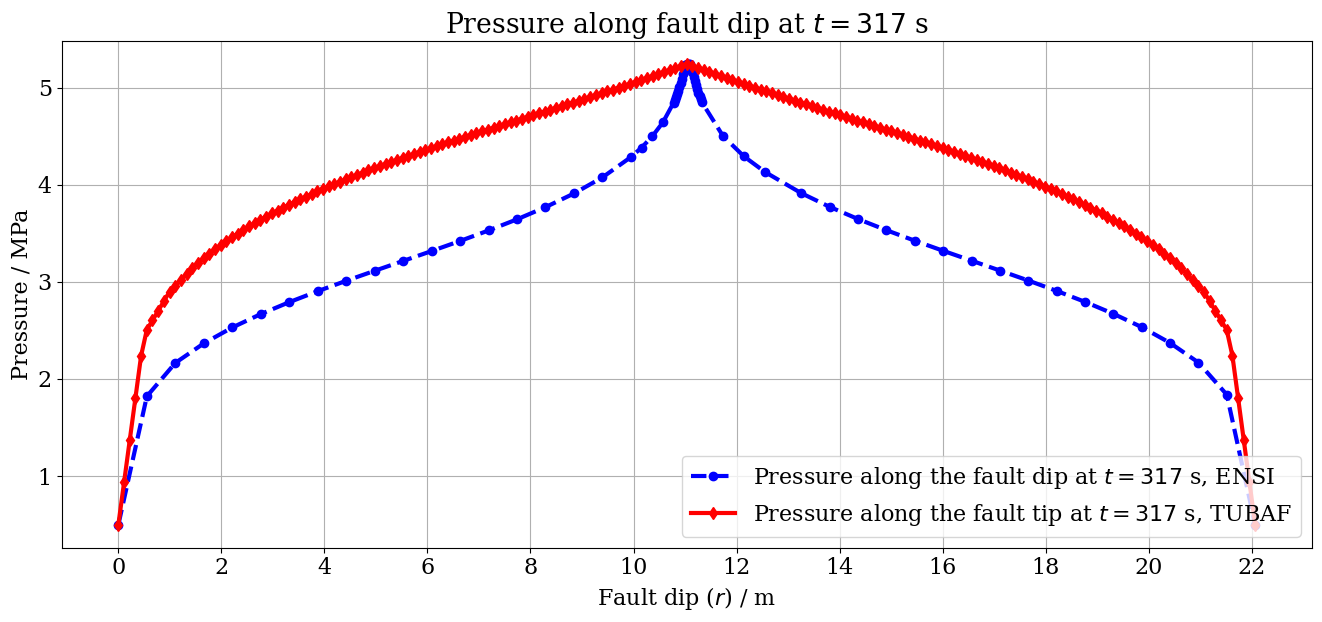

In [35]:
fig, ax = plt.subplots(figsize=(13.5, 6.5))

# Plot the first dataset (ENSI pressure along the fault dip) after filtering out zeros
nonzero_indices_1 = profiles_along_fault_dip_FM2[1] != 0  # Find non-zero indices
ax.plot(
    profiles_along_fault_dip_FM2[0][nonzero_indices_1],  # Filter x-values
    profiles_along_fault_dip_FM2[1][nonzero_indices_1]
    * 1e-6,  # Filter y-values and convert to MPa
    label="Pressure along the fault dip at $t=317$ s, ENSI",
    color="blue",
    ls="--",
    marker="o",
)

# Define the time for the second dataset
itime = 317

# Plot the second dataset (TUBAF pressure along the fault tip) after filtering out zeros
rad_data = rad[::5]
pressure_data = (
    pvdfile_FM2.read_set_data(
        itime, "pressure_interpolated", pointsetarray=fpoints_mid
    )[::5]
    * 1e-6
)
nonzero_indices_2 = pressure_data != 0  # Find non-zero indices
ax.plot(
    rad_data[nonzero_indices_2],  # Filter x-values
    pressure_data[nonzero_indices_2],  # Filter y-values
    label=f"Pressure along the fault tip at $t = {itime}$ s, TUBAF",
    color="red",
    ls="-",
    marker="d",
)

# Set plot title and axis labels
ax.set_title("Pressure along fault dip at $t=317$ s")
ax.set_xlabel("Fault dip ($r$) / m")
ax.set_ylabel("Pressure / MPa")
ax.set_xticks(np.arange(0, 24, 2))
ax.legend(loc="lower right")
ax.grid(True)
# Adjust layout
fig.tight_layout()

# Injection Rate

(0.0, 800.0)

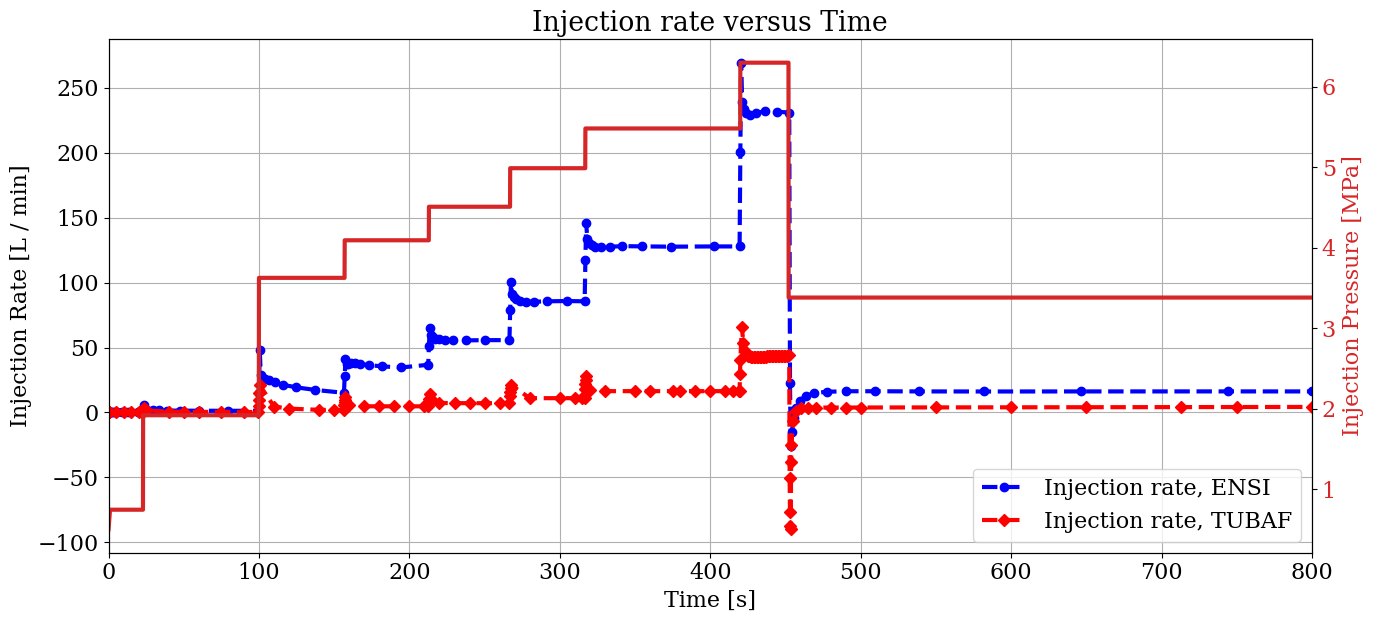

In [36]:
fig, ax1 = plt.subplots(figsize=(13.5, 6.5))
flowRate_sum = 0.0
for i in range(len(flowRate_points)):
    flowRate_sum += results["MassFlowRate"][f"pt{i}"]

ax1.plot(
    FM2[1],
    FM2[2],
    label="Injection rate, ENSI",
    color="blue",
    ls="--",
    marker="o",
)
ax1.plot(
    timeSteps,
    flowRate_sum * 60.0,
    label="Injection rate, TUBAF",
    color="red",
    ls="--",
    marker="D",
)

ax1.set_title("Injection rate versus Time")
ax1.set_xlabel("Time [s]")
ax1.set_ylabel("Injection Rate [L / min]")
ax1.set_xticks(np.arange(0, 900, 100))
ax1.legend()
ax1.legend(loc="lower right")
ax1.grid(True)
fig.tight_layout()
# Create a second y-axis for the second data series
ax2 = ax1.twinx()
color = "tab:red"
ax2.set_ylabel("Injection Pressure [MPa]", color=color)  # For the second data series
ax2.plot(injectionPressure[0], injectionPressure[4] / 1e6, color=color)
ax2.tick_params(axis="y", labelcolor=color)
ax2.set_xlim([0, 800])

# Differential displacements between anchors

(0.0, 800.0)

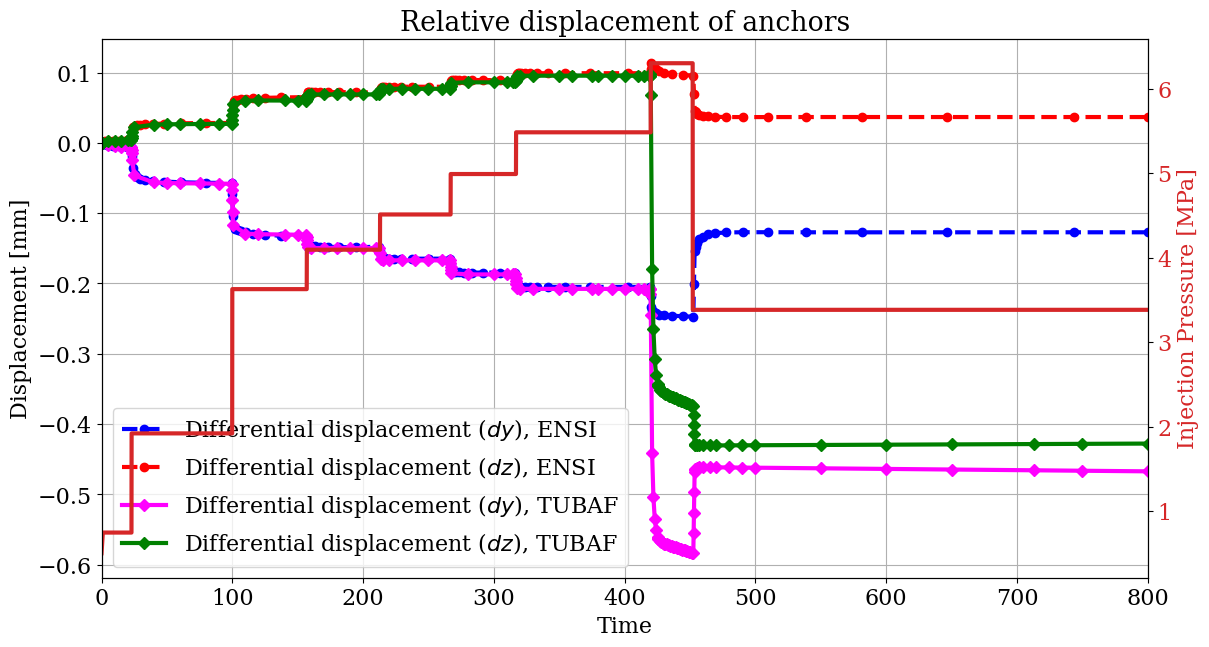

In [37]:
fig, ax1 = plt.subplots(figsize=(13.5, 7))
ax1.plot(
    FM2[1],
    FM2[6] * 1000.0,
    label="Differential displacement ($dy$), ENSI",
    color="blue",
    ls="--",
    marker="o",
)

ax1.plot(
    FM2[1],
    FM2[7] * 1000.0,
    label="Differential displacement ($dz$), ENSI",
    color="red",
    ls="--",
    marker="o",
)

ax1.plot(
    timeSteps,
    results["displacement"]["pt0"].T[0] * 1000
    - results["displacement"]["pt1"].T[0] * 1000,
    label="Differential displacement ($dy$), TUBAF",
    color="magenta",
    ls="-",
    marker="D",
)

ax1.plot(
    timeSteps,
    results["displacement"]["pt0"].T[1] * 1000
    - results["displacement"]["pt1"].T[1] * 1000,
    label="Differential displacement ($dz$), TUBAF",
    color="green",
    ls="-",
    marker="D",
)

ax1.set_title("Relative displacement of anchors")
ax1.set_xlabel("Time")
ax1.set_ylabel("Displacement [mm]")
ax1.legend(loc="best")
ax1.grid(True)

# Create a second y-axis for the second data series
ax2 = ax1.twinx()
color = "tab:red"
ax2.set_ylabel("Injection Pressure [MPa]", color=color)  # For the second data series
ax2.plot(injectionPressure[0], injectionPressure[4] / 1e6, color=color)
ax2.tick_params(axis="y", labelcolor=color)
ax2.set_xlim([0, 800])

# Fault displacement at P1: $(0., 0., 0.)$

In [38]:
u_nd, u_sd = {}, {}
u_nd, u_sd = displacement_ns(results, 155, "pt2", "pt3")

(0.0, 800.0)

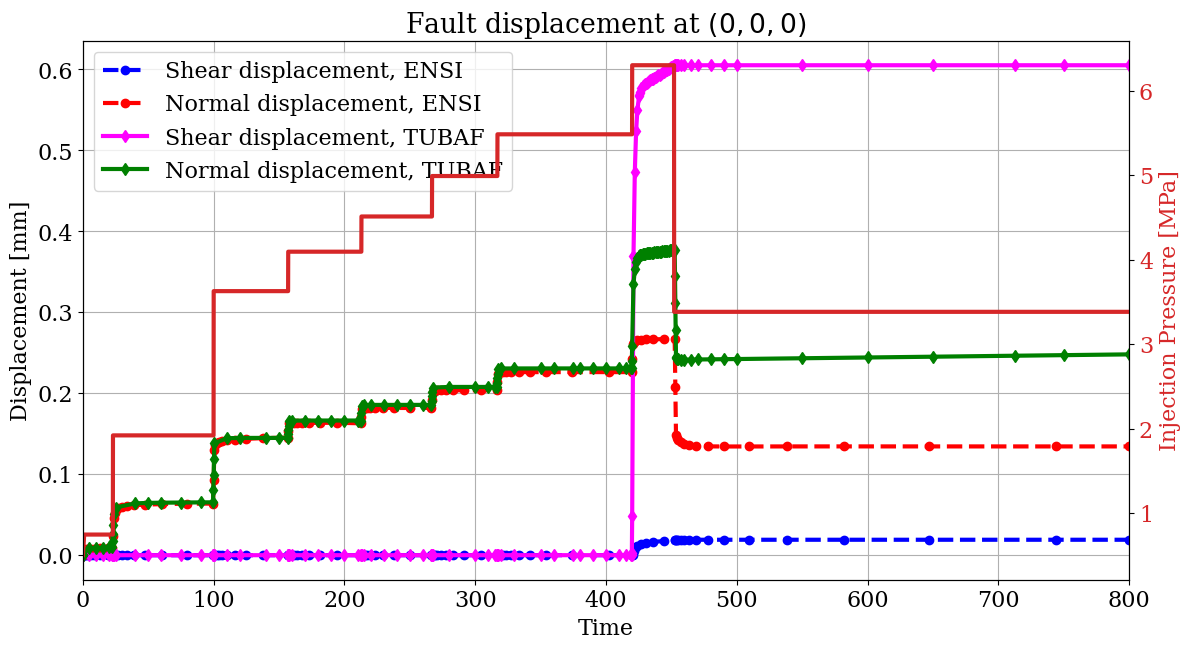

In [39]:
fig, ax1 = plt.subplots(figsize=(13.5, 7))
ax1.plot(
    FM2[1],
    FM2[8] * 1000.0,
    label="Shear displacement, ENSI",
    color="blue",
    ls="--",
    marker="o",
)  # Line plot with markers
ax1.plot(
    FM2[1],
    FM2[10] * 1000.0,
    label="Normal displacement, ENSI",
    color="red",
    ls="--",
    marker="o",
)  # Line plot with markers
ax1.plot(
    timeSteps,
    u_sd * 1000.0,
    label="Shear displacement, TUBAF",
    color="magenta",
    ls="-",
    marker="d",
)
ax1.plot(
    timeSteps,
    u_nd * 1000.0,
    label="Normal displacement, TUBAF",
    color="green",
    ls="-",
    marker="d",
)
ax1.set_title("Fault displacement at $(0, 0, 0)$")
ax1.set_xlabel("Time")
ax1.set_ylabel("Displacement [mm]")
ax1.legend(loc="best")
ax1.grid(True)

# Create a second y-axis for the second data series
ax2 = ax1.twinx()
color = "tab:red"
ax2.set_ylabel("Injection Pressure [MPa]", color=color)  # For the second data series
ax2.plot(injectionPressure[0], injectionPressure[4] / 1e6, color=color)
ax2.tick_params(axis="y", labelcolor=color)
ax2.set_xlim([0, 800])

# Fault displacement at P3: $(0.0, -0.63, -1.36)$

In [40]:
u_nd, u_sd = {}, {}
u_nd, u_sd = displacement_ns(results, 155, "pt4", "pt5")

(0.0, 800.0)

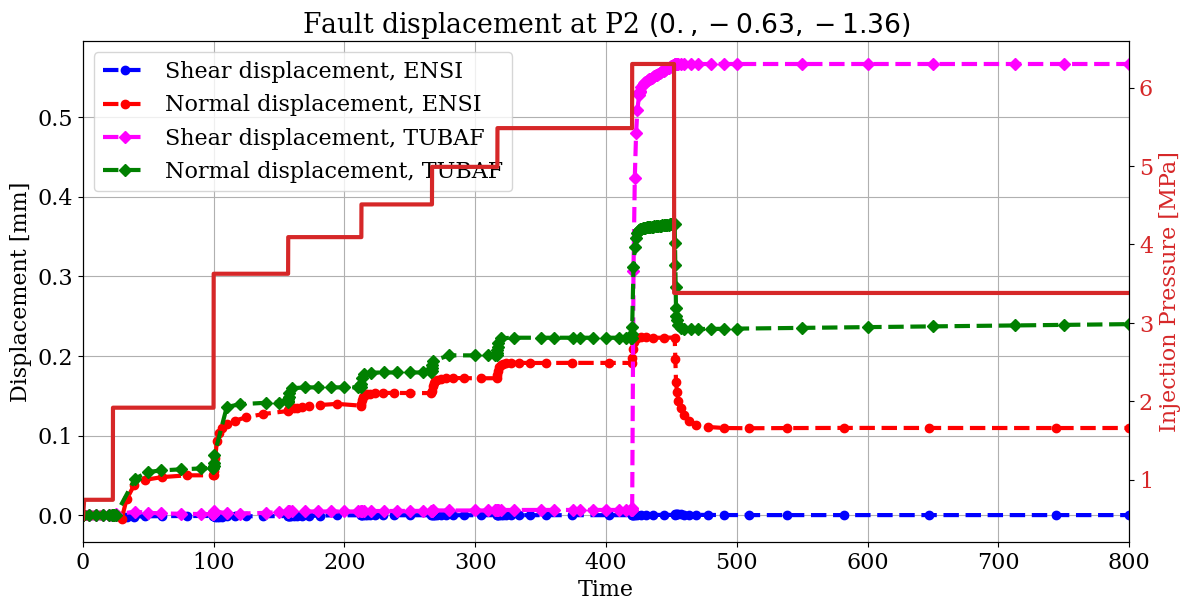

In [41]:
fig, ax1 = plt.subplots(figsize=(13.5, 6.5))
ax1.plot(
    FM2[1],
    FM2[14] * 1000.0,
    label="Shear displacement, ENSI",
    color="blue",
    ls="--",
    marker="o",
)
ax1.plot(
    FM2[1],
    FM2[16] * 1000.0,
    label="Normal displacement, ENSI",
    color="red",
    ls="--",
    marker="o",
)
ax1.plot(
    timeSteps,
    u_sd * 1000.0,
    label="Shear displacement, TUBAF",
    color="magenta",
    ls="--",
    marker="D",
)
ax1.plot(
    timeSteps,
    u_nd * 1000.0,
    label="Normal displacement, TUBAF",
    color="green",
    ls="--",
    marker="D",
)
ax1.set_title("Fault displacement at P2 $(0., -0.63, -1.36)$")
ax1.set_xlabel("Time")
ax1.set_ylabel("Displacement [mm]")
ax1.legend()
ax1.grid(True)

# Create a second y-axis for the second data series
ax2 = ax1.twinx()
color = "tab:red"
ax2.set_ylabel("Injection Pressure [MPa]", color=color)  # For the second data series
ax2.plot(injectionPressure[0], injectionPressure[4] / 1e6, color=color)
ax2.tick_params(axis="y", labelcolor=color)
ax2.set_xlim([0, 800])
# Set x-axis limits

# Fault stress at P1:$(0., 0., 0.)$

In [45]:
theta = 155.0
pt = "pt0"
file = results["stress"]
sig01, sig02, sig12, sig00, sig11, sig22, sigma_wp, tau_wp = (
    {},
    {},
    {},
    {},
    {},
    {},
    {},
    {},
)
sig01, sig02, sig12, sig00, sig11, sig22, sigma_wp, tau_wp = stress_ns(file, pt, theta)

(0.0, 800.0)

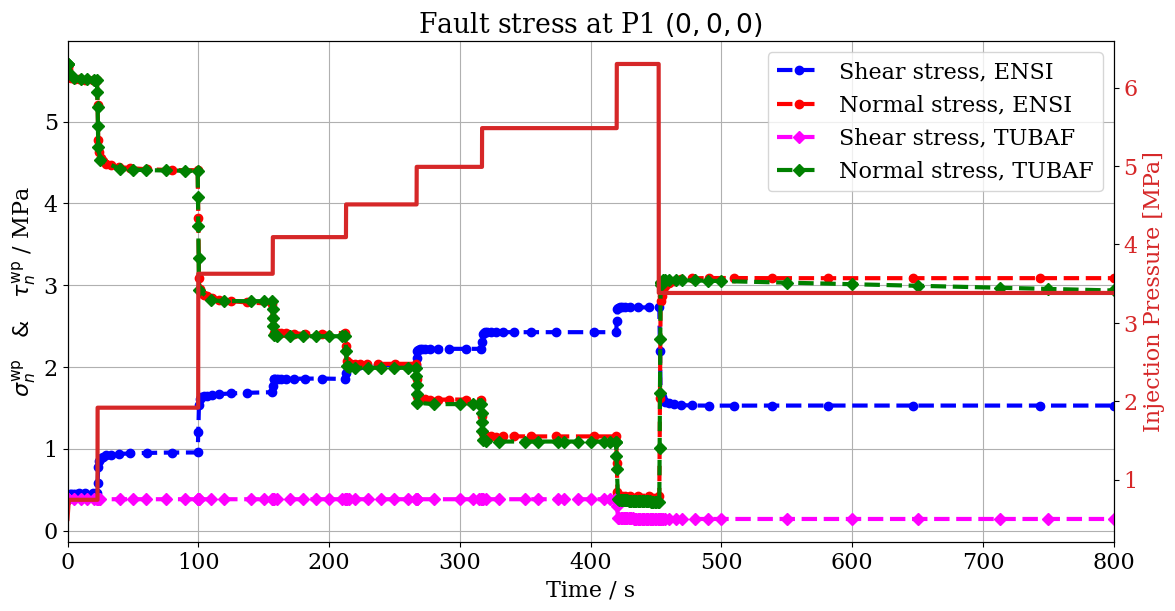

In [46]:
fig, ax1 = plt.subplots(figsize=(13.5, 6.5))
ax1.plot(
    FM2[1],
    FM2[17] * 1e-6,
    label="Shear stress, ENSI",
    color="blue",
    ls="--",
    marker="o",
)
ax1.plot(
    FM2[1],
    FM2[18] * 1e-6,
    label="Normal stress, ENSI",
    color="red",
    ls="--",
    marker="o",
)
ax1.plot(
    timeSteps,
    tau_wp[1:] * 1e-6,
    label="Shear stress, TUBAF",
    color="magenta",
    ls="--",
    marker="D",
)
ax1.plot(
    timeSteps,
    -sigma_wp[1:] * 1e-6,
    label="Normal stress, TUBAF",
    color="green",
    ls="--",
    marker="D",
)
ax1.set_ylabel("$\\sigma^{\\mathrm{wp}}_n  \quad & \quad \\tau^{\\mathrm{wp}}_n$ / MPa")
ax1.set_xlabel("Time / s")
ax1.set_title("Fault stress at P1 $(0, 0, 0)$")
ax1.legend()
ax1.grid(True)

# Create a second y-axis for the second data series
ax2 = ax1.twinx()
color = "tab:red"
ax2.set_ylabel("Injection Pressure [MPa]", color=color)  # For the second data series
ax2.plot(injectionPressure[0], injectionPressure[4] / 1e6, color=color)
ax2.tick_params(axis="y", labelcolor=color)
ax2.set_xlim([0, 800])

# Fault stress at P3:$(0., -0.63, -1.36)$

In [47]:
theta = 155.0
pt = "pt1"
file = results["stress"]
sig01, sig02, sig12, sig00, sig11, sig22, sigma_wp, tau_wp = (
    {},
    {},
    {},
    {},
    {},
    {},
    {},
    {},
)
sig01, sig02, sig12, sig00, sig11, sig22, sigma_wp, tau_wp = stress_ns(file, pt, theta)

(0.0, 800.0)

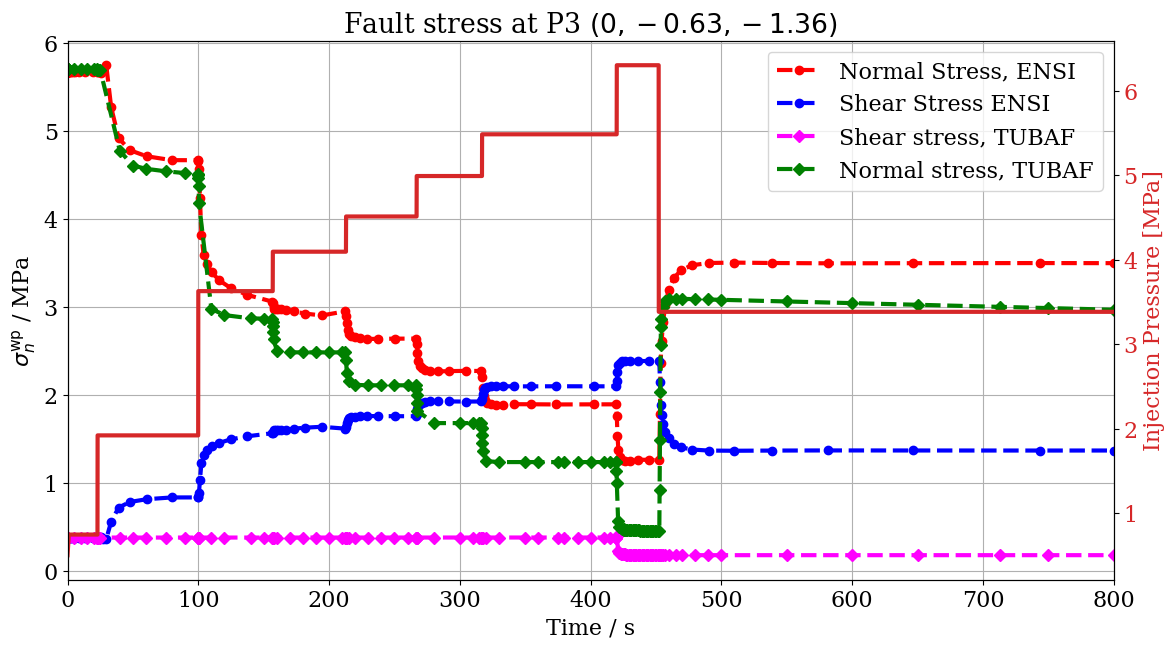

In [49]:
fig, ax1 = plt.subplots(figsize=(13.5, 7))
ax1.plot(
    FM2[1],
    FM2[22] * 1e-6,
    label="Normal Stress, ENSI",
    color="red",
    ls="--",
    marker="o",
)  # Line plot with markers
ax1.plot(
    FM2[1], FM2[21] * 1e-6, label="Shear Stress ENSI", color="blue", ls="--", marker="o"
)  # Line plot with markers
ax1.plot(
    timeSteps,
    # -sig01[1:] * 1e-6,
    tau_wp[1:] * 1e-6,
    label="Shear stress, TUBAF",
    color="magenta",
    ls="--",
    marker="D",
)
ax1.plot(
    timeSteps,
    -sigma_wp[1:] * 1e-6,
    label="Normal stress, TUBAF",
    color="green",
    ls="--",
    marker="D",
)
ax1.set_ylabel("$\\sigma^{\\mathrm{wp}}_n$ / MPa")
ax1.set_xlabel("Time / s")
ax1.set_title("Fault stress at P3 $(0, -0.63, -1.36)$")
ax1.legend()
ax1.grid(True)

# Create a second y-axis for the second data series
ax2 = ax1.twinx()
color = "tab:red"
ax2.set_ylabel("Injection Pressure [MPa]", color=color)  # For the second data series
ax2.plot(injectionPressure[0], injectionPressure[4] / 1e6, color=color)
ax2.tick_params(axis="y", labelcolor=color)
ax2.set_xlim([0, 800])
# Set x-axis limits

# Dispalcement jumps between two points (M and N) located on the left and right hand side of the fault along a line prependicular to the fault

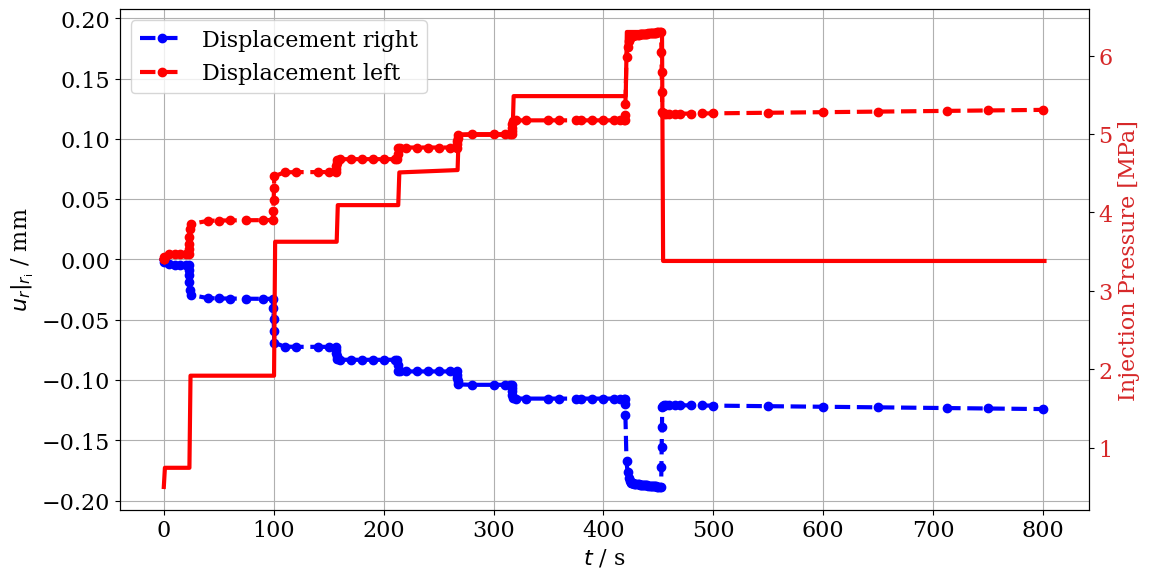

In [50]:
fig, ax1 = plt.subplots(figsize=(12.5, 6.5))
thetap = 155.0
thetam = -25
u_np, u_nm, u_sp, u_sm = displacement_jump(results, thetap, thetam)

ax1.plot(
    timeSteps,
    u_np * 1000.0,
    label="Displacement right",
    ls="--",
    color="blue",
    marker="o",
)
ax1.plot(
    timeSteps,
    u_nm * 1000.0,
    label="Displacement left",
    ls="--",
    color="red",
    marker="o",
)
ax1.set_xlabel("$t$ / s")
ax1.grid(True)
ax1.set_ylabel("$u_r|_{r_\\mathrm{i}}$ / mm")
ax1.legend(loc="upper left")

# Create a second y-axis for the second data series
ax2 = ax1.twinx()
color = "tab:red"
ax2.plot(
    dt.cumsum()[1:] - dt[1],
    p[1:],
    label="Injected pressure pressure in MPa",
    color="red",
)
ax2.set_xlabel("$t-t_\\mathrm{ic}$ / s")
ax2.set_ylabel("Injection Pressure [MPa]", color=color)  # For the second data series
ax2.tick_params(axis="y", labelcolor=color)

# Evolution of permeability ($k_d$) along fault dip

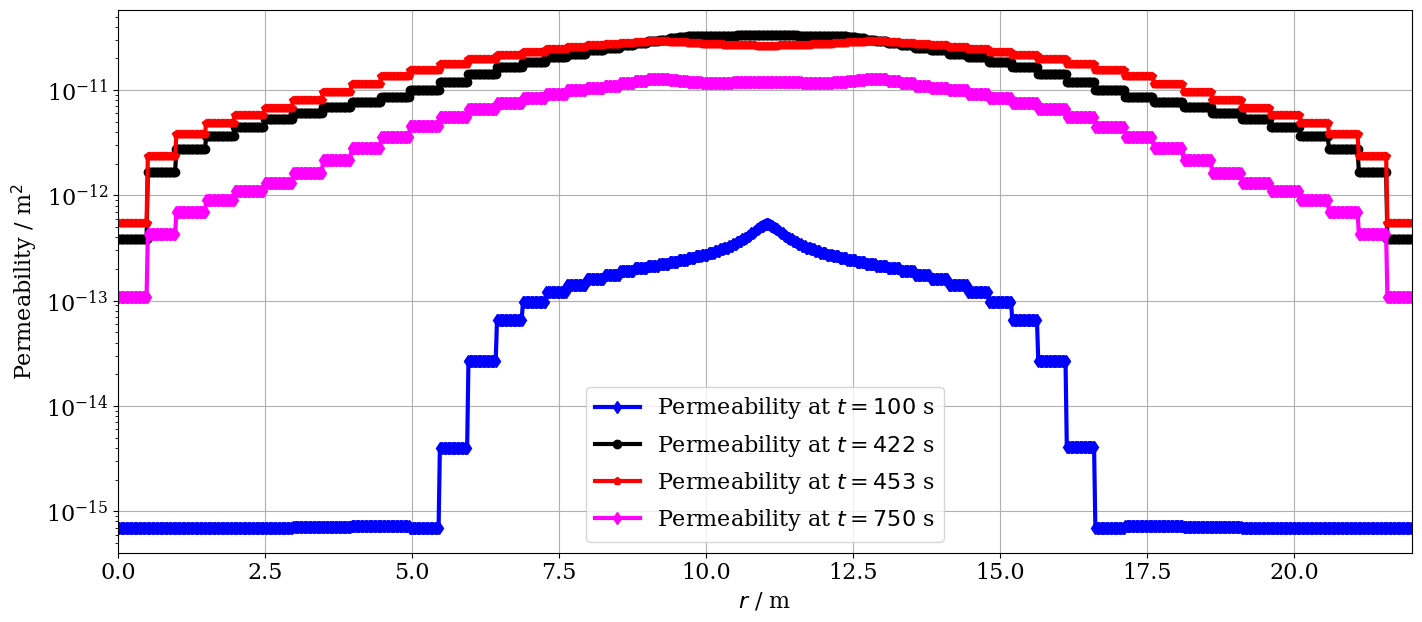

In [51]:
Time = [100, 422, 453, 750]
colors = ["blue", "black", "red", "magenta"]
markers = ["d", "o", "p"]
fig, ax = plt.subplots(figsize=(14.5, 6.5))

# Plotting loop
for k, i in enumerate(Time):
    # Read permeability data
    permeability_data = pvdfile_FM2.read_set_data(
        i, "permeability", pointsetarray=fpoints_mid
    ).T[0]
    # Filter out zero values
    filtered_indices = permeability_data != 0
    filtered_rad = rad[filtered_indices]
    filtered_permeability = permeability_data[filtered_indices]

    # Plot filtered data
    ax.plot(
        filtered_rad,
        filtered_permeability,
        label=f"Permeability at $t = {i}$ s",
        color=colors[k % len(colors)],
        ls="-",
        marker=markers[k % len(markers)],
    )

# Customizations
ax.set(
    xlabel="$r$ / m",
    ylabel="Permeability / m$^\mathrm{2}$",
    xlim=(0.0, 22.0),
)
plt.yscale("log")  # Logarithmic y-axis
ax.legend()
ax.grid(True)
fig.tight_layout()

# Evolution of weak plane equivalent plastic strain along fault dip

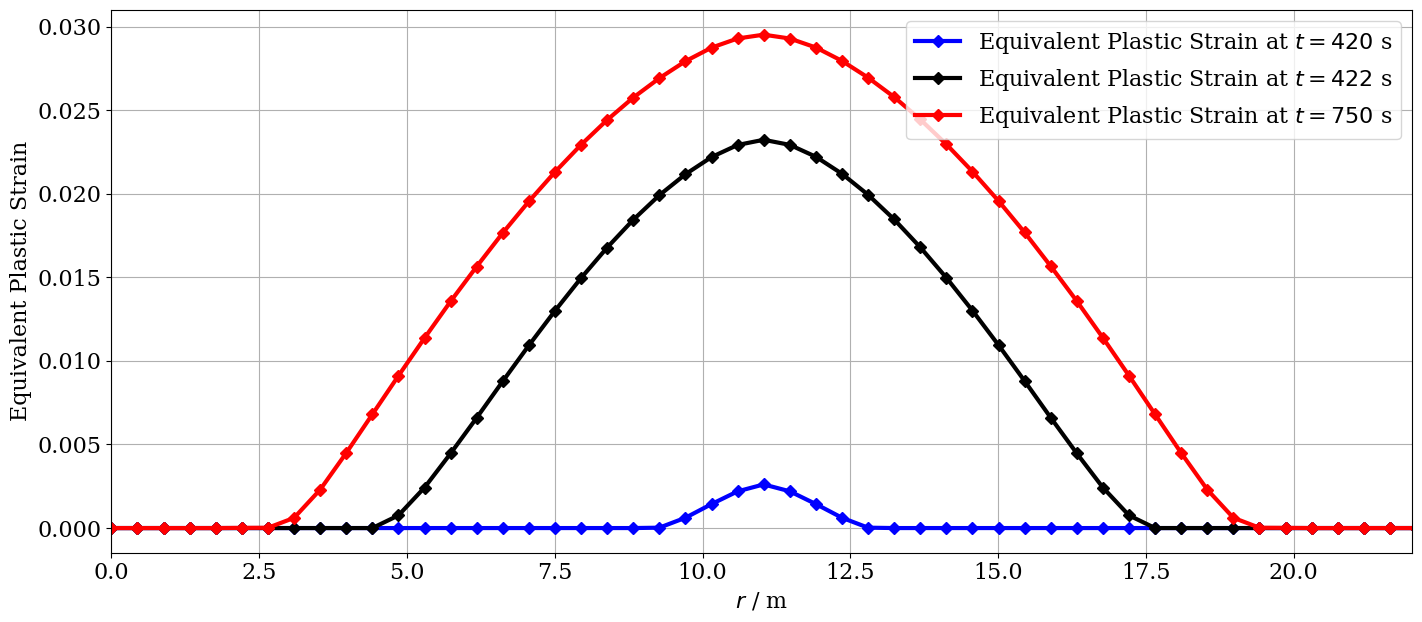

In [52]:
Time = [420, 422, 750]
k = 0
fig, ax = plt.subplots(figsize=(14.5, 6.5))
threshold = 1e-16
for i in Time:
    colors = ["blue", "black", "red", "magenta"]
    markers = ["d", "o"]
    peeq = pvdfile_FM2.read_set_data(
        i, "EquivalentPlasticStrainWP", pointsetarray=fpoints_mid
    )
    peeq_data = peeq.copy()
    peeq_data[peeq <= threshold] = 0.0
    ax.plot(
        rad[::20],
        peeq_data[::20],
        label="Equivalent Plastic Strain at $t = %i$ s" % i,
        color=colors[k],
        ls="-",
        marker="D",
    )
    k += 1
ax.set(xlim=(0.0, 22.0), autoscale_on=True)
ax.set_xlabel("$r$ / m")
ax.set_ylabel("Equivalent Plastic Strain")
ax.legend()
ax.grid(True)
fig.tight_layout()

# Visualization of displacement magnitude

/tmp/ipykernel_311958/2278117383.py:12: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap("jet", 35)


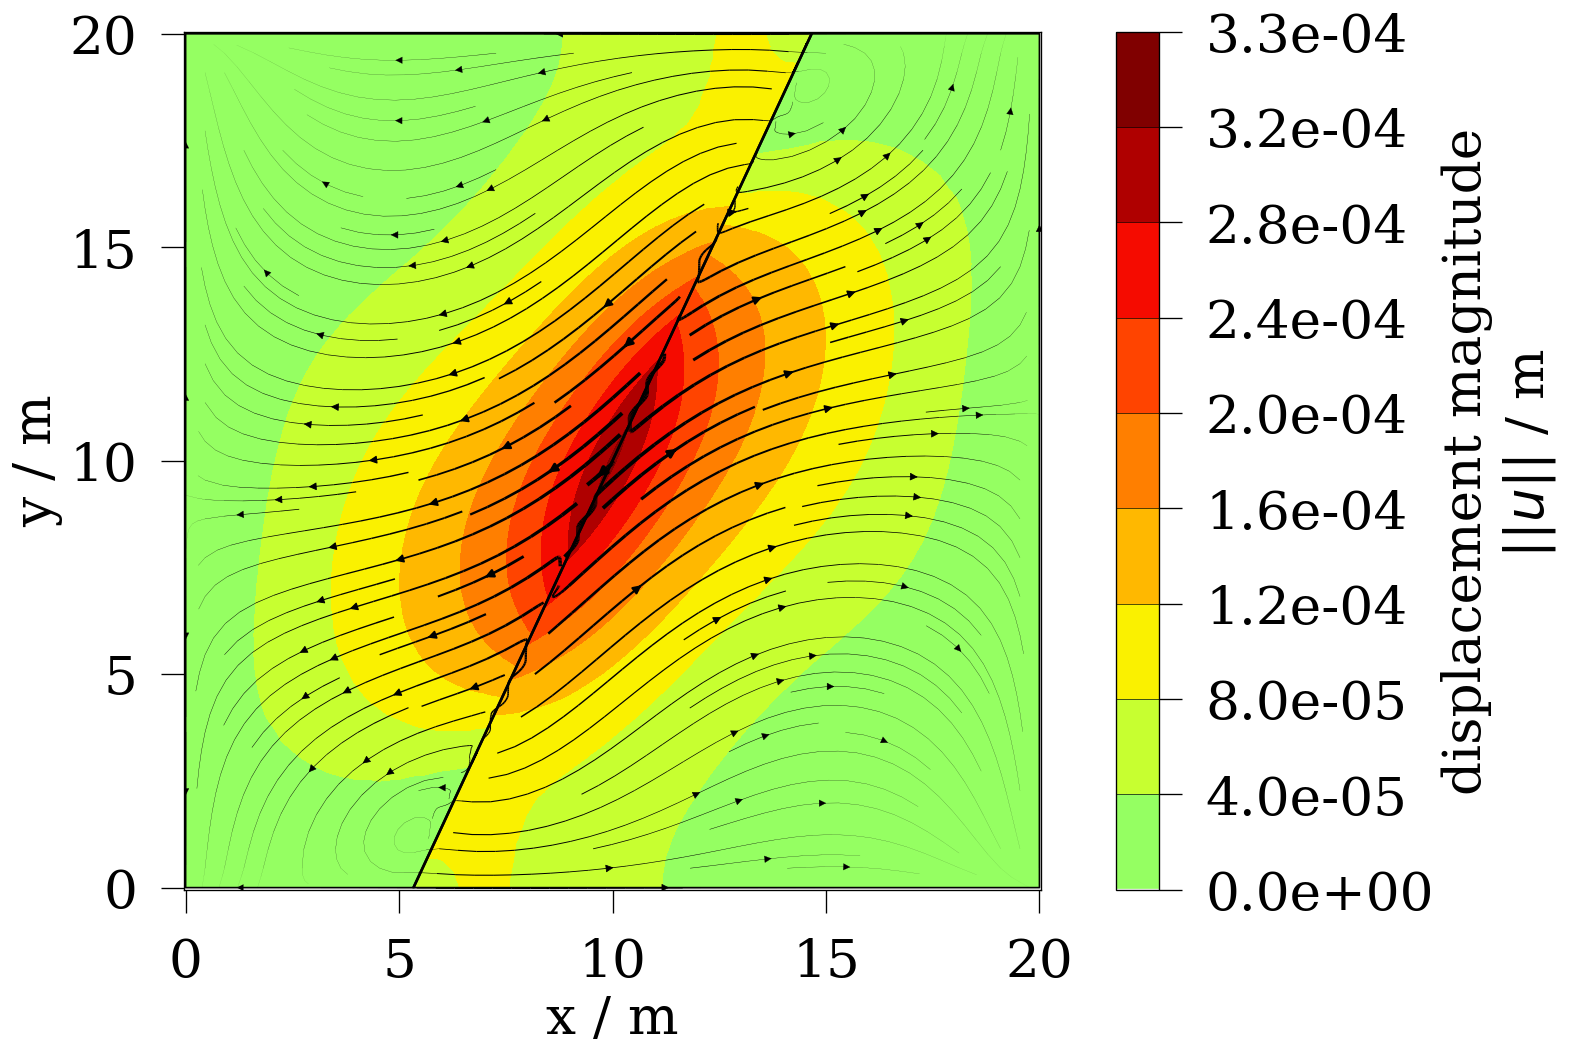

In [53]:
import ogstools as ot
from ogstools.meshlib import MeshSeries
import matplotlib.pyplot as plt

# Load the mesh time series
mesh_series = MeshSeries("./_out_FM2/FM2.pvd")

# Select a specific time step
mesh = mesh_series[-1]

# Define a discrete colormap with 35 levels
cmap = plt.cm.get_cmap("jet", 35)

# Plot with the custom colormap
fig = mesh.plot_contourf(
    ot.variables.displacement,
    show_min=False,
    show_max=False,
    cmap="jet",
)